# <font>Projeto Decifrando o Cliente: O Que Faz uma Campanha Ser Aceita?</font>

---

## 🧩 Introdução

O avanço da tecnologia e a digitalização das relações de consumo têm proporcionado às empresas a oportunidade de coletar e armazenar uma quantidade massiva de dados sobre seus clientes. No entanto, transformar esses dados em conhecimento acionável ainda é um desafio. 

Campanhas de marketing direcionadas representam uma ferramenta estratégica para maximizar o retorno sobre investimento e aumentar a conversão em vendas. Entretanto, nem todos os clientes reagem da mesma forma às ações de marketing. Assim, compreender os fatores que influenciam a aceitação de uma campanha torna-se essencial para a eficiência das iniciativas comerciais.

Este projeto visa explorar de forma profunda os dados relacionados ao perfil, comportamento e histórico de compras dos clientes, com o objetivo de identificar padrões e características que influenciam a aceitação de campanhas de marketing. O estudo faz uso de técnicas estatísticas e métodos de análise multivariada para oferecer suporte à tomada de decisão baseada em dados.

---

## 🎯 Definição do Problema

A empresa fornecedora dos dados deseja compreender por que alguns clientes aceitam campanhas de marketing enquanto outros as ignoram. A partir disso, pretende-se responder à seguinte pergunta central:

> **Quais fatores explicam o comportamento de aceitação de campanhas de marketing pelos clientes?**

Para isso, serão realizadas as seguintes etapas:

- Análise exploratória das variáveis comportamentais e transacionais dos clientes;
- Identificação de padrões e agrupamentos utilizando técnicas de análise multivariada;
- Construção de modelos explicativos que revelem os principais determinantes da aceitação das campanhas;
- Formulação de recomendações orientadas para a segmentação de clientes e otimização de estratégias de marketing.

O objetivo final é fornecer **insights claros e práticos** que possibilitem uma **melhor alocação dos recursos de marketing** e aumentem a **eficiência das campanhas comerciais**.

---


# Menu

* [1.0 Instalando e Carregando Pacotes](#10-instalando-e-carregando-pacotes)
* [2.0 Carregando os Dados](#20-carregando-os-dados)
* [3.0 Limpeza e Processamento Inicial dos Dados](#30-limpeza-e-processamento-inicial-dos-dados)
* [4.0 Analise Exploratoria e Engenharia de Atributos](#40-analise-exploratoria-e-engenharia-de-atributos)
* [5.0 Análise Multivariada](#50-análise-multivariada)
* [6.0 Teste de Hipóteses](#60-teste-de-hipóteses)

# 1.0 Instalando e Carregando Pacotes

In [1]:
import importlib    # Importa o módulo 'importlib', que permite importar bibliotecas dinamicamente em tempo de execução
import subprocess   # Importa o módulo 'subprocess' para executar comandos externos, como instalar pacotes via pip
import sys          # Importa o módulo 'sys' para acessar o interpretador Python atual e seu executável


# Dicionário contendo os pacotes que devem ser verificados e instalados, se necessário.
# A chave é o nome usado para importar o módulo, e o valor é o nome usado no pip para instalação.
required_packages = {
    'sklearn': 'scikit-learn',     # sklearn é importado como módulo, mas instalado com o nome scikit-learn
    'scipy': 'scipy',              # scipy é tanto o nome de importação quanto de instalação
    'pandas': 'pandas',            # pandas para análise de dados tabulares
    'numpy': 'numpy',              # numpy para operações numéricas
    'matplotlib': 'matplotlib',    # matplotlib para visualizações
    'seaborn': 'seaborn',          # seaborn para gráficos estatísticos
    'missingno': 'missingno'       # missingno para visualização de dados ausentes
}

# Função responsável por verificar se o pacote está instalado.
# Caso não esteja, ela o instala automaticamente usando pip.
def check_and_install(package_name, install_name):
    try:
        # Tenta importar o pacote. Se for bem-sucedido, ele já está instalado.
        importlib.import_module(package_name)
        print(f"✅ Biblioteca '{package_name}' já está instalada.")
    except ImportError:
        # Caso a importação falhe, significa que a biblioteca não está instalada.
        # O código abaixo usa o subprocess para executar o comando: python -m pip install <nome_do_pacote>
        print(f"⚠️ Biblioteca '{package_name}' não encontrada. Instalando '{install_name}'...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
        print(f"✅ Biblioteca '{install_name}' instalada com sucesso.")

# Loop que percorre cada item do dicionário de pacotes.
# Para cada pacote, chama a função de verificação e instalação, se necessário.
for package, install_name in required_packages.items():
    check_and_install(package, install_name)

✅ Biblioteca 'sklearn' já está instalada.
✅ Biblioteca 'scipy' já está instalada.
✅ Biblioteca 'pandas' já está instalada.
✅ Biblioteca 'numpy' já está instalada.
✅ Biblioteca 'matplotlib' já está instalada.
✅ Biblioteca 'seaborn' já está instalada.
✅ Biblioteca 'missingno' já está instalada.


In [2]:
# Imports
import sklearn                                      # Biblioteca para aprendizado de máquina
import scipy                                        # Biblioteca para computação científica
import pandas as pd                                 # Biblioteca para análise de dados
import numpy as np                                  # Biblioteca para computação numérica
import matplotlib.pyplot as plt                     # Biblioteca para visualização de dados
import seaborn as sns                               # Biblioteca para visualização de dados baseada em matplotlib
import missingno as msno                            # Biblioteca para visualização de dados ausentes
from scipy.stats import shapiro                     # Função para o teste de normalidade Shapiro-Wilk
from scipy.stats import mannwhitneyu                # Função para o teste Mann-Whitney U
from sklearn.impute import KNNImputer               # Classe para imputação de dados ausentes usando K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler    # Classe para normalização de dados
from sklearn.ensemble import RandomForestClassifier # Classe para o classificador Random Forest
from datetime import datetime                       # Biblioteca para manipulação de datas e horas
import warnings                                     # Biblioteca para controle de avisos e alertas

warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Ricardo de Souza Silva" 

Author: Ricardo de Souza Silva



# 2.0 Carregando os Dados

In [4]:
# Lista para identificar os valores ausentes
lista_labels_valores_ausentes = ["n/a,", "na", "undefined"]

In [5]:
# Carrega o dataset
dataset = pd.read_csv("dados/dados_clientes.csv", na_values = lista_labels_valores_ausentes)

In [6]:
# Shape
dataset.shape

(2237, 25)

In [7]:
# Amostra dos dados
dataset.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [8]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

# 3.0 Limpeza e Processamento Inicial dos Dados

## 3.1 Renomeação e Adequação das Colunas (Variáveis)

In [9]:
dataset.columns

Index(['ID', ' Ano_Nascimento', ' Educacao', ' Estado_Civil', ' Renda',
       ' Criancas_Em_Casa', ' Adolescentes_Em_Casa', ' Data_Cadastro_Cliente',
       ' Gasto_Vinhos', ' Gasto_Frutas', ' Gasto_Carnes', ' Gasto_Peixes',
       ' Gasto_Doces', ' Gasto_Outros', ' Num_Compras_Promocionais',
       ' Num_Compras_Web', ' Num_Compras_Catalogo', ' Num_Compras_Loja',
       ' Num_Visitas_Web_Mes', ' Aceitou_Campanha_1', ' Aceitou_Campanha_2',
       ' Aceitou_Campanha_3', ' Aceitou_Campanha_4', ' Aceitou_Campanha_5',
       ' Aceitou_Campanha_6'],
      dtype='object')

In [10]:
dataset.rename(columns={'ID':'id', ' Ano_Nascimento':'ano_nascimento', ' Educacao': 'educacao',
                        ' Estado_Civil': 'estado_civil', ' Renda': 'renda', 
                        ' Criancas_Em_Casa': 'crianca_em_casa', ' Adolescentes_Em_Casa': 'adolescente_em_casa',
                        ' Data_Cadastro_Cliente': 'data_cadastro_cliente',' Gasto_Vinhos': 'gasto_com_vinho',
                        ' Gasto_Frutas': 'gasto_com_frutas', ' Gasto_Carnes': 'gasto_com_carnes',
                        ' Gasto_Peixes': 'gasto_com_peixes',' Gasto_Doces': 'gasto_com_doces',
                        ' Gasto_Outros': 'gasto_com_outros', ' Num_Compras_Promocionais': 'num_compras_promocionais',
                        ' Num_Compras_Web': 'num_compras_web', ' Num_Compras_Catalogo': 'num_compras_catalogo',
                        ' Num_Compras_Loja': 'num_compras_loja',' Num_Visitas_Web_Mes': 'num_visitas_web_mes',
                        ' Aceitou_Campanha_1': 'aceitou_campanha_01', ' Aceitou_Campanha_2': 'aceitou_campanha_02',
                        ' Aceitou_Campanha_3': 'aceitou_campanha_03', ' Aceitou_Campanha_4': 'aceitou_campanha_04', 
                        ' Aceitou_Campanha_5':'aceitou_campanha_05',' Aceitou_Campanha_6': 'aceitou_campanha_06' }, inplace=True)
dataset.columns

Index(['id', 'ano_nascimento', 'educacao', 'estado_civil', 'renda',
       'crianca_em_casa', 'adolescente_em_casa', 'data_cadastro_cliente',
       'gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
       'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
       'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
       'num_compras_loja', 'num_visitas_web_mes', 'aceitou_campanha_01',
       'aceitou_campanha_02', 'aceitou_campanha_03', 'aceitou_campanha_04',
       'aceitou_campanha_05', 'aceitou_campanha_06'],
      dtype='object')

---

<span style="color: ;font-size: 26px;">Justificativa da Renomeação de Colunas</span>

A renomeação das colunas foi realizada com o objetivo de **padronizar e tornar mais acessível a manipulação das variáveis** ao longo do projeto de análise e modelagem. As mudanças seguiram boas práticas de nomenclatura em ciência de dados, como:

1. **Remoção de espaços e caracteres especiais**: Espaços em nomes de colunas podem causar problemas em manipulações via código, especialmente em funções que utilizam notação por ponto (`df.nome_coluna`). Exemplo: `' Aceitou_Campanha_1' → 'aceitou_campanha_01'`.

2. **Conversão para letras minúsculas**: Isso facilita a leitura e garante uniformidade, já que o Python é case-sensitive. Exemplo: `'Educacao' → 'educacao'`.

3. **Uso de snake_case**: O padrão `snake_case` é amplamente adotado em projetos de programação com Python, pois melhora a legibilidade e evita ambiguidade. Exemplo: `'Data_Cadastro_Cliente' → 'data_cadastro_cliente'`.

4. **Correções semânticas e ortográficas**: Algumas colunas receberam ajustes para refletir melhor o significado dos dados. Exemplo: ' Adolescentes_Em_Casa' → 'adolescente_em_casa'.

5. **Padronização numérica**: Os sufixos das campanhas foram padronizados com zero à esquerda para facilitar ordenações e agrupamentos futuros. Exemplo: `'Aceitou_Campanha_1' → 'aceitou_campanha_01'`.

---


In [11]:
# Remove todos os espaços em branco dos nomes das colunas para evitar erros e facilitar a manipulação
dataset.columns = dataset.columns.str.replace(' ', '')

In [12]:
# A variável Renda tem o caracter $. Vamos remover esse caracter especial para ter a coluna como numérica
# Remove os símbolos de dólar e vírgulas na coluna 'Renda' e converte os valores para o tipo float
dataset['renda'] = dataset['renda'].str.replace('$', '').str.replace(',', '').astype(float)  

In [13]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
# Converte a coluna 'data_cadastro_cliente' para o tipo datetime
dataset['data_cadastro_cliente'] = pd.to_datetime(dataset['data_cadastro_cliente'])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2237 non-null   int64         
 1   ano_nascimento            2237 non-null   int64         
 2   educacao                  2237 non-null   object        
 3   estado_civil              2237 non-null   object        
 4   renda                     2213 non-null   float64       
 5   crianca_em_casa           2237 non-null   int64         
 6   adolescente_em_casa       2237 non-null   int64         
 7   data_cadastro_cliente     2237 non-null   datetime64[ns]
 8   gasto_com_vinho           2237 non-null   int64         
 9   gasto_com_frutas          2237 non-null   int64         
 10  gasto_com_carnes          2237 non-null   int64         
 11  gasto_com_peixes          2237 non-null   int64         
 12  gasto_com_doces     

## 3.2 Verificação Valores Ausentes

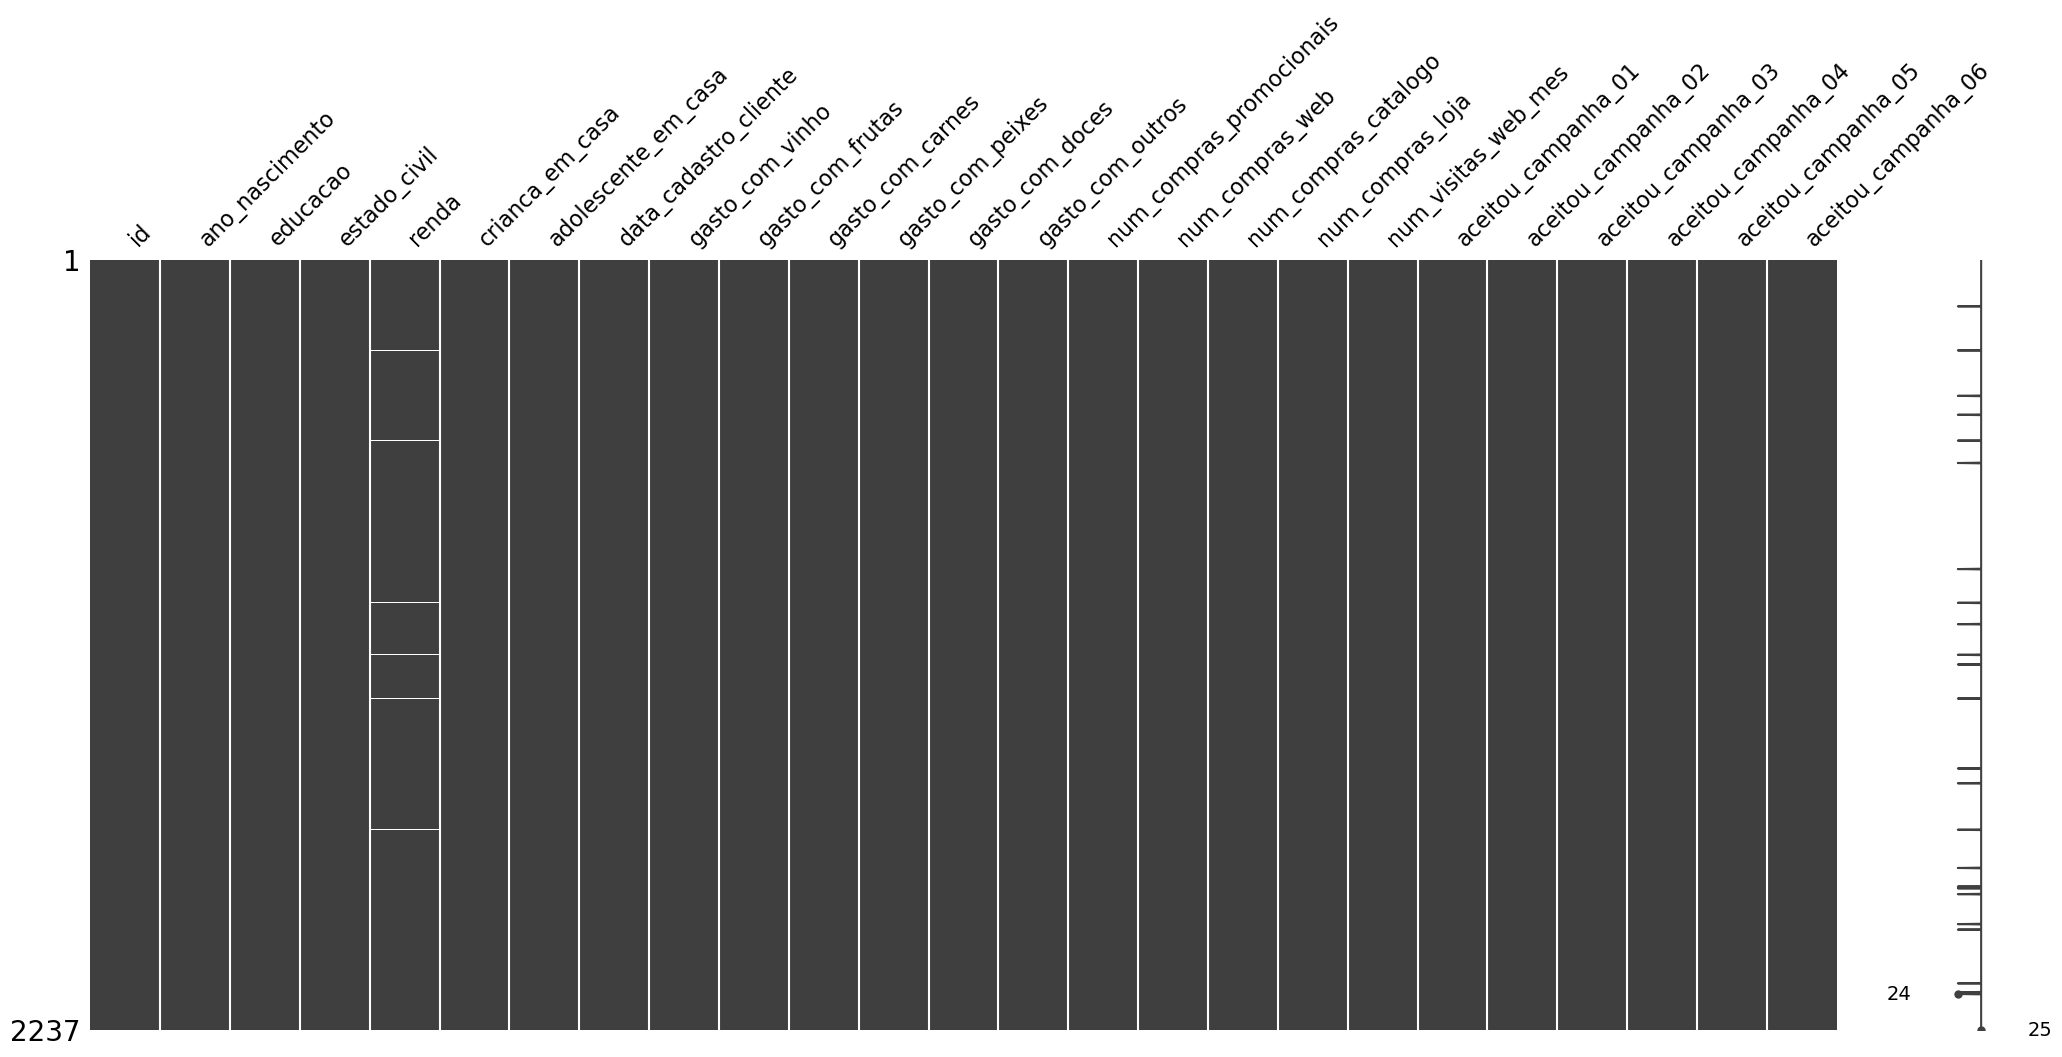

In [15]:
# Matriz de valores ausentes
msno.matrix(dataset)     # Gera uma visualização da matriz de dados ausentes do DataFrame 'dataset'
plt.show()               # Exibe a visualização gerada

---

<span style="color: ; font-size: 26px;">Visualização da Matriz de Valores Ausentes</span>
 

Para investigar a qualidade dos dados e identificar possíveis problemas com valores nulos, foi utilizada a função `msno.matrix()` da biblioteca `missingno`. Essa função gera uma representação gráfica que permite:

- **Visualizar rapidamente quais colunas possuem dados ausentes**;
- **Entender a distribuição dos dados ausentes ao longo dos registros (linhas)**;
- **Verificar se há algum padrão, como valores ausentes recorrentes em certos grupos de variáveis**;
- **Identificar se a ausência de dados é aleatória ou concentrada em determinados perfis**.

#### Vantagens dessa visualização:
- Muito mais intuitiva do que apenas ver `dataset.isnull().sum()` ou `dataset.info()`;
- Permite enxergar **correlações visuais** entre valores ausentes em diferentes colunas;
- Ajuda a decidir se vale a pena aplicar **remoção**, **imputação** ou mesmo **exclusão de variáveis**.

#### Interpretação do gráfico:
Como observado no gráfico acima, os dados ausentes estão concentrados exclusivamente na coluna `renda`, o que pode indicar:
- Problemas no preenchimento ou registro de informações financeiras por parte dos clientes;
- Dados sensíveis que alguns clientes optaram por não informar.

Esse tipo de visualização é especialmente útil **na etapa de diagnóstico e limpeza**, sendo uma ferramenta importante para justificar decisões de pré-processamento antes da modelagem.

---

In [16]:
# Calcula o número de valores ausentes em cada coluna, ordenando as colunas em ordem decrescente
valores_ausentes = dataset.isnull().sum().sort_values(ascending=False)
valores_ausentes

renda                       24
id                           0
gasto_com_outros             0
aceitou_campanha_05          0
aceitou_campanha_04          0
aceitou_campanha_03          0
aceitou_campanha_02          0
aceitou_campanha_01          0
num_visitas_web_mes          0
num_compras_loja             0
num_compras_catalogo         0
num_compras_web              0
num_compras_promocionais     0
gasto_com_doces              0
ano_nascimento               0
gasto_com_peixes             0
gasto_com_carnes             0
gasto_com_frutas             0
gasto_com_vinho              0
data_cadastro_cliente        0
adolescente_em_casa          0
crianca_em_casa              0
estado_civil                 0
educacao                     0
aceitou_campanha_06          0
dtype: int64

In [17]:
# Filtra e exibe apenas as colunas do DataFrame 'valores_ausentes' que possuem pelo menos um valor ausente (diferente de zero)
valores_ausentes.loc[valores_ausentes!=0]

renda    24
dtype: int64

In [18]:
# Remove a coluna 'id' do DataFrame, pois ela não é relevante para análise ou modelagem.
# A remoção é feita no próprio DataFrame original (inplace=True), sem necessidade de reatribuição.
dataset = dataset.drop(['id'], axis=1)

## 3.3 Verificação Valores Outliers e Quartis

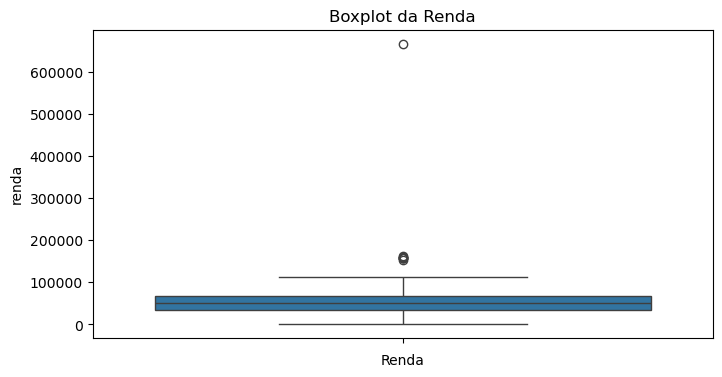

In [19]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize=(8, 4))      # Define o tamanho da figura como 10x6 polegadas
sns.boxplot(dataset['renda'])   # Cria um boxplot da coluna 'Renda' do DataFrame 
plt.title('Boxplot da Renda')   # Define o título do gráfico como 'Boxplot da Renda'
plt.xlabel('Renda')             # Define o rótulo do eixo x como 'Renda'
plt.show()                      # Exibe o gráfico

In [20]:
# Exibe um resumo estatístico descritivo da variável 'renda', arredondando os valores para duas casas decimais
round(dataset['renda'].describe().T, 2)

count      2213.00
mean      52236.58
std       25178.60
min        1730.00
25%       35246.00
50%       51373.00
75%       68487.00
max      666666.00
Name: renda, dtype: float64

---

<span style="color: ; font-size: 26px;">Análise Inicial da Variável <code>renda</code> e Considerações sobre Dados Ausentes </span>


Através do boxplot apresentado acima e da estatística descritiva da variável `renda`, é possível observar a presença de **valores discrepantes (outliers)**.

- O valor máximo registrado é **666.666**, muito acima do terceiro quartil (**75% = 68.487**) e da média (**52.236**), o que indica a existência de pelo menos um outlier extremo.
- A dispersão dos dados é relativamente elevada, com um desvio padrão de **25.178**, o que reforça a possibilidade de valores fora do padrão.
- A mediana (**50% = 51.373**) está próxima da média, indicando que a distribuição não é severamente assimétrica, mas ainda assim há valores que distorcem a escala do gráfico.

Além disso, ao investigar os dados ausentes no dataset, observamos que a variável `renda` apresenta **valores nulos**. Isso levanta uma hipótese importante:  
*A ausência de dados pode estar associada a registros anômalos ou mal preenchidos*, onde os outliers extremos podem surgir justamente de valores incorretamente imputados ou oriundos de entradas ausentes substituídas manualmente por valores padrão (como `666.666`).

Dessa forma, é essencial conduzir a análise de outliers **em conjunto com o diagnóstico dos dados ausentes**, garantindo que ambas as anomalias sejam tratadas adequadamente. Essa abordagem visa melhorar a qualidade do dataset, tornando as análises e modelagens futuras mais confiáveis.

Com isso, **seguiremos com a análise e o tratamento dos outliers da variável `renda`**, verificando também o impacto da presença de valores nulos nessa distorção estatística.

---


In [21]:
# Calcula o primeiro quartil (Q1), terceiro quartil (Q3) e a amplitude interquartil (IQR) da coluna 'renda' do DataFrame 'dataset'
Q1 = dataset['renda'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = dataset['renda'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Amplitude interquartil

In [22]:
# Calcula os limites inferior e superior para identificação de outliers usando a regra do IQR
limite_inferior = Q1 - 1.5 * IQR  # Limite inferior
limite_superior = Q3 + 1.5 * IQR  # Limite superior

In [23]:
# Identificando os outliers
# Seleciona os outliers da coluna 'Renda' com base nos limites inferior e superior calculados anteriormente
outliers = dataset[(dataset['renda'] < limite_inferior) | (dataset['renda'] > limite_superior)]  
outliers

,ano_nascimento,educacao,estado_civil,renda,crianca_em_casa,adolescente_em_casa,data_cadastro_cliente,gasto_com_vinho,gasto_com_frutas,gasto_com_carnes,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_01,aceitou_campanha_02,aceitou_campanha_03,aceitou_campanha_04,aceitou_campanha_05,aceitou_campanha_06
325,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,1725,...,0,28,0,1,0,0,0,0,0,0
497,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,1622,...,0,28,1,0,0,0,0,0,0,0
526,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,18,...,3,1,3,6,0,0,0,0,0,0
730,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,16,...,0,0,1,1,0,0,0,0,0,0
851,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,9,...,1,0,1,1,0,0,0,0,0,0
1787,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2165,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,1582,...,0,22,0,0,0,0,0,0,0,0


## 3.4 Verificando a Distribuição Normal

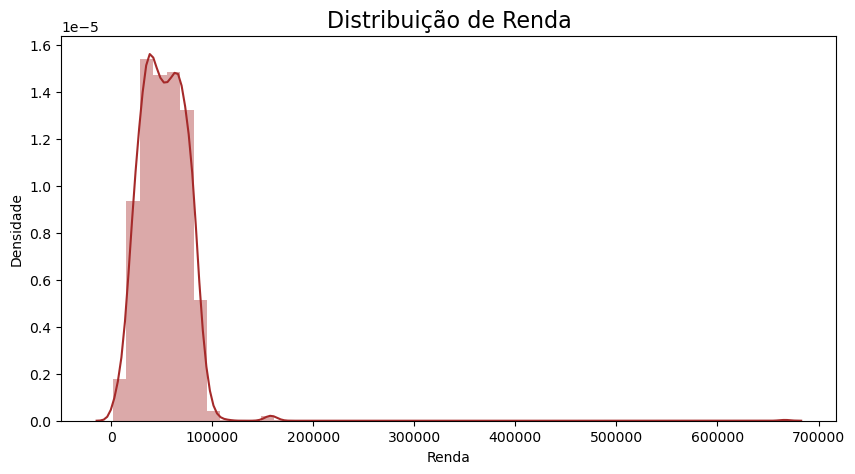

In [24]:
# Define o tamanho da figura como 10x5 polegadas para melhor visualização
plt.figure(figsize=(10, 5))

# Cria um gráfico de distribuição (histograma + KDE) da variável 'renda'
# OBS: sns.distplot() está depreciada nas versões recentes do seaborn.
# A cor do gráfico é definida como marrom (color='brown') para destacar a curva
sns.distplot(dataset['renda'], color='brown')

# Define os rótulos dos eixos
plt.ylabel('Densidade')
plt.xlabel('Renda')

# Define o título do gráfico
plt.title('Distribuição de Renda', fontsize=16)

# Exibe o gráfico
plt.show()

---

<span style="color: ; font-size: 26px;">Análise da Distribuição da Variável <code>renda</code></span>

O gráfico apresentado mostra a **distribuição da variável `renda`**, representando tanto o **histograma** quanto a **curva de densidade (KDE)**. Com base na visualização, podemos destacar os seguintes pontos:

1. **Assimetria à Direita (Distribuição Assimétrica Positiva)**  
   A curva apresenta uma **cauda longa à direita**, indicando que a maior parte dos clientes possui rendas concentradas entre **valores mais baixos**, enquanto uma **pequena parcela possui rendas extremamente altas**. Essa assimetria é conhecida como:
   - **Assimetria positiva**, onde a média é maior que a mediana;
   - Frequentemente associada à presença de **outliers extremos**.

2. **Densidade concentrada**  
   A maior parte da densidade (pico da curva) está entre aproximadamente **R$ 0 e R$ 100.000**, o que representa o padrão da maioria dos clientes. Isso reforça que os valores fora desse intervalo são exceções e devem ser analisados com cautela.

3. **Impacto dos outliers**  
   A cauda alongada (valores acima de R$ 200.000) indica que existem poucos registros com valores muito altos que estão **distorcendo a escala da distribuição**, o que:
   - Pode mascarar padrões nos dados principais;
   - Prejudica algoritmos sensíveis a escala e distribuição;
   - Justifica a necessidade de tratamento ou transformação da variável (`logarítmica`, `raiz quadrada`, `Box-Cox` etc.).

4. **Implicações para modelagem**  
   Uma variável com essa distribuição pode **violar suposições de normalidade**, especialmente em modelos estatísticos como regressão linear. Portanto, o tratamento adequado da assimetria é fundamental para:
   - Melhorar a performance preditiva;
   - Aumentar a estabilidade do modelo;
   - Evitar que os outliers tenham impacto desproporcional.

---



## 3.5 Tratando Outliers e Valores Nulos

### 3.5.1 Tratamendo dos Outliers

In [25]:
# Filtra o DataFrame 'dataset', mantendo apenas os registros em que os valores da coluna 'renda' estão dentro dos limites definidos (entre lower_bound e upper_bound). 
# Isso é feito para remover outliers e manter apenas os dados dentro de um intervalo considerado aceitável.
dataset = dataset[(dataset['renda']>= limite_inferior) & (dataset['renda']<=limite_superior)]

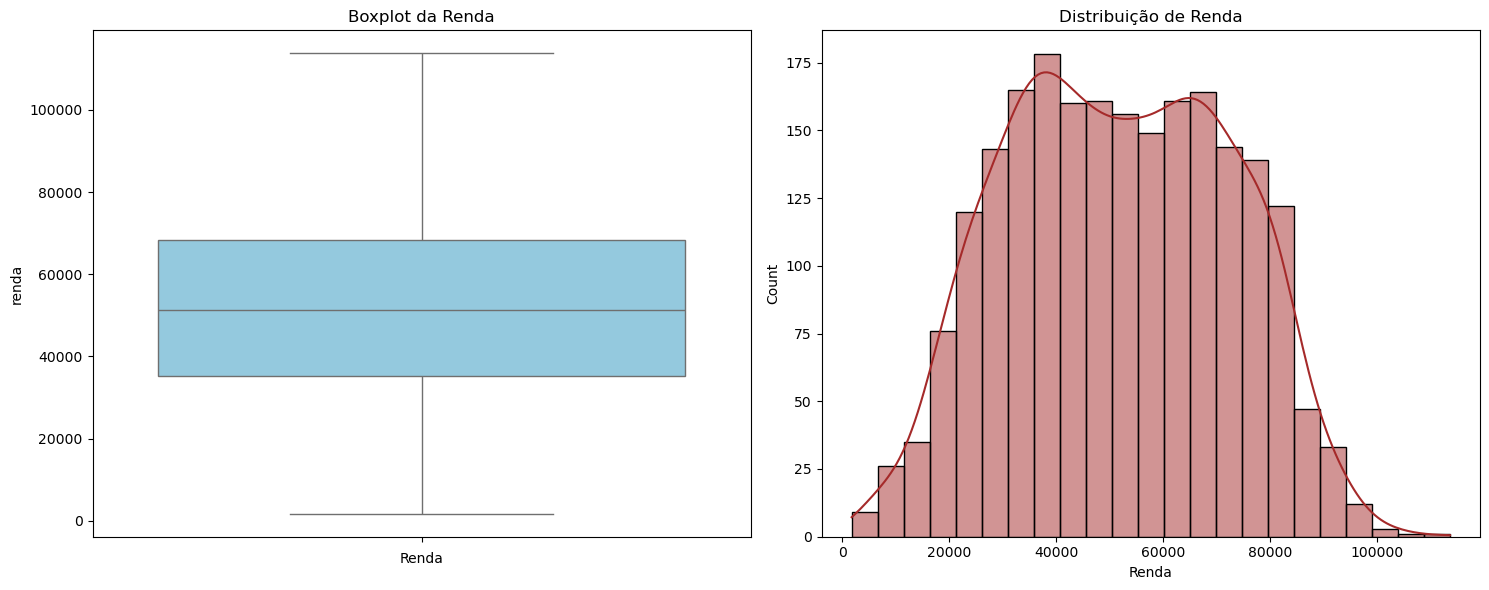

In [26]:
# Criando uma figura com 1 linha e 2 colunas de gráficos (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 linha, 2 colunas, tamanho total da figura

# Primeiro gráfico: Boxplot da renda
sns.boxplot(y=dataset['renda'], ax=axes[0], color='skyblue')  # Define o gráfico no primeiro eixo (esquerda)
axes[0].set_title('Boxplot da Renda')                         # Título do gráfico
axes[0].set_xlabel('Renda')                                   # Rótulo do eixo X

# Segundo gráfico: Distribuição da renda (Histograma + KDE)
sns.histplot(dataset['renda'], kde=True, ax=axes[1], color='brown')  # Define o gráfico no segundo eixo (direita)
axes[1].set_title('Distribuição de Renda')                           # Título do gráfico
axes[1].set_xlabel('Renda')                                          # Rótulo do eixo X

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe ambos os gráficos
plt.show()

---

<span style="font-size: 26px;">Visualização da Renda Após o Tratamento de Outliers <code>renda</code></span>

Após aplicarmos o filtro para remover valores extremos com base no intervalo interquartil (IQR), a variável `renda` apresenta agora uma distribuição mais consistente e adequada para análise e modelagem.

Boxplot (à esquerda):
- A nova visualização mostra que os **valores extremos foram removidos**, e o boxplot agora representa apenas a faixa central dos dados.
- O gráfico está mais compacto, e a dispersão está dentro dos limites definidos pelo IQR, o que facilita a interpretação visual e estatística da variável.

Histograma + KDE (à direita):
- A curva de densidade (KDE) evidencia uma **distribuição mais simétrica e concentrada**, especialmente entre R$ 20.000 e R$ 80.000.
- A ausência de caudas longas à direita indica que os **outliers que distorciam a escala foram tratados**.
- Isso torna a variável mais adequada para modelagem estatística e algoritmos de machine learning, reduzindo o risco de viés nos resultados.

**Conclusão:**

A remoção dos outliers contribuiu para melhorar a qualidade da variável `renda`, proporcionando gráficos mais informativos e modelos mais robustos. Agora podemos prosseguir com as análises multivariadas e cruzamentos com outras variáveis com mais confiança.

---

### 3.5.2 Tratamendo dos Nulos com KNN(K-Nearest Neighbors)

In [27]:
# Normaliza os dados antes de aplicar o KNNImputer (opcional, mas recomendado)
scaler = StandardScaler()                                # Inicializa o objeto StandardScaler
data_scaled = scaler.fit_transform(dataset[['renda']])   # Aplica o escalonamento padrão à coluna 'renda' do DataFrame 'dataset'

In [28]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Inicializa o objeto KNNImputer com 5 vizinhos para imputação de valores ausentes

In [29]:
# Imputa os valores ausentes com o imputer, aplica o imputador KNN (K-Nearest Neighbors) aos dados escalonados 'data_scaled', imputando valores ausentes
data_imputed = imputer.fit_transform(data_scaled)

In [30]:
# Converter de volta para o formato original 
# Reverte a transformação aplicada anteriormente usando o StandardScaler, restaurando os valores originais da coluna 'Renda' do DataFrame
dataset['renda'] = scaler.inverse_transform(data_imputed)

In [31]:
print('Total de Valores Ausentes:', dataset.isnull().sum().sum())

Total de Valores Ausentes: 0


---

<span style="color: ; font-size: 26px;">Tratamento de Valores Ausentes – Variável <code>renda</code></span>

Durante a etapa de pré-processamento dos dados, foi identificado que a variável **`renda`** apresentava valores ausentes. A presença de dados nulos em variáveis numéricas pode comprometer análises estatísticas, distorcer visualizações e impactar negativamente o desempenho de modelos preditivos. Dessa forma, tornou-se necessário aplicar um método eficiente e confiável de imputação.

Metodologia Utilizada

Para o tratamento dos valores ausentes, optou-se por utilizar o algoritmo **KNNImputer (K-Nearest Neighbors Imputer)**, uma abordagem baseada em vizinhos mais próximos. A lógica desse método consiste em preencher os valores ausentes com base na média dos registros mais semelhantes (vizinhos) dentro do conjunto de dados.

Dado que o algoritmo KNN é sensível à escala das variáveis, aplicou-se o seguinte fluxo:

1. **Normalização dos Dados**:  
   A variável `renda` foi normalizada utilizando o `StandardScaler`, padronizando os dados com média 0 e desvio padrão 1. Esse procedimento é fundamental para que o KNN calcule distâncias entre os registros de forma coerente.

2. **Aplicação do `KNNImputer`**:  
   Utilizou-se o parâmetro `n_neighbors=5`, permitindo que a imputação fosse feita com base nos 5 registros mais próximos para cada valor ausente. Esse processo permite preservar padrões do conjunto de dados original.

3. **Desnormalização**:  
   Após a imputação, os valores foram convertidos de volta à escala original da variável, utilizando o método inverso do `StandardScaler`, assegurando a consistência com os demais registros da base.

4. **Validação**:  
   Após o processo, foi verificado que **não restavam valores nulos na base**, confirmando a eficácia do tratamento aplicado.

Resultados e Vantagens

- Todos os valores ausentes da variável `renda` foram tratados com sucesso.
- A estratégia adotada **preservou a estrutura e os padrões reais** dos dados, evitando distorções comuns em métodos de imputação simples.
- O uso do KNNImputer contribui para um conjunto de dados mais **robusto e confiável**, pronto para análises multivariadas e modelagem preditiva.

---

# 4.0 Análise Exploratória e Engenharia de Atributos

## 4.1 Análise Exploratória Boxplots  

In [32]:
# Seleciona do DataFrame 'dataset' as colunas relevantes para análise de perfil e comportamento de consumo do cliente.
# Essas variáveis serão utilizadas para visualização ou análise, como um boxplot, por exemplo.

dados_para_box_plot = dataset[['renda',                       # Renda anual do cliente
                               'crianca_em_casa',             # Número de crianças vivendo na casa do cliente
                               'adolescente_em_casa',         # Número de adolescentes na casa do cliente
                               'data_cadastro_cliente',       # Data em que o cliente foi cadastrado no sistema
                               'gasto_com_vinho',             # Valor gasto com vinhos
                               'gasto_com_frutas',            # Valor gasto com frutas
                               'gasto_com_carnes',            # Valor gasto com carnes
                               'gasto_com_peixes',            # Valor gasto com peixes
                               'gasto_com_doces',             # Valor gasto com doces
                               'gasto_com_outros',            # Valor gasto com outros tipos de produtos
                               'num_compras_promocionais',    # Quantidade de compras feitas em períodos promocionais
                               'num_compras_web',             # Quantidade de compras feitas pela internet
                               'num_compras_catalogo',        # Quantidade de compras realizadas por catálogo
                               'num_compras_loja',            # Quantidade de compras feitas presencialmente em loja física
                               'num_visitas_web_mes'          # Número de visitas ao site da loja por mês
                             ]]


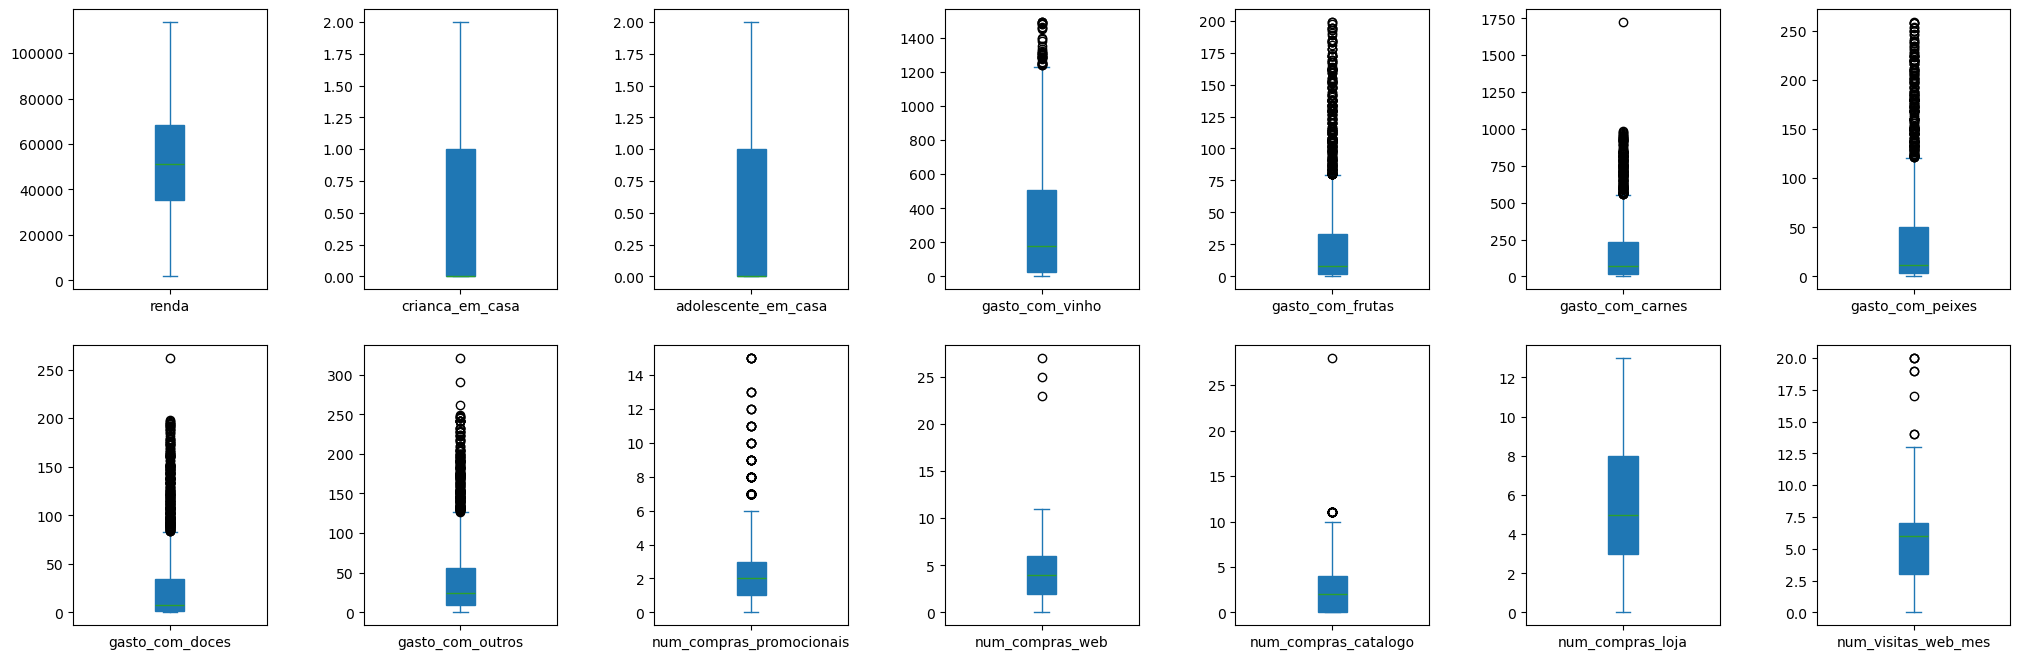

In [33]:
# Cria boxplots individuais para cada coluna numérica do DataFrame 'dados_para_box_plot'
# Cada boxplot será exibido em um subplot separado
dados_para_box_plot.plot(
    subplots=True,          # Gera um gráfico separado (subplot) para cada variável
    layout=(2, 7),          # Organiza os subplots em um grid de 2 linhas e 7 colunas
    kind='box',             # Define o tipo de gráfico como boxplot
    figsize=(25, 8),        # Define o tamanho total da figura (largura=25, altura=8)
    patch_artist=True       # Preenche as caixas do boxplot com cores
)
# Ajusta o espaçamento horizontal entre os subplots
plt.subplots_adjust(wspace=0.5)

---

<span style="font-size: 26px;">Justificativa Técnica para Manter Outliers no Estudo</span>

Considerando o escopo e o objetivo do estudo apresentado compreender profundamente os fatores que influenciam a aceitação das campanhas de marketing é fortemente recomendado **não excluir os outliers** identificados nas variáveis relacionadas ao comportamento transacional dos clientes (ex.: gastos em produtos e frequência de compras).

A decisão de manter esses dados está embasada nos seguintes pontos principais:

**Refletem Segmentos Reais e Estratégicos de Clientes**
- **Clientes com gastos significativamente superiores** (ex: vinho, carnes, frutos do mar, doces) podem pertencer a um **segmento premium ou VIP**, essencial para estratégias de marketing direcionadas.
- Ignorar esses dados significaria eliminar um grupo de clientes potencialmente estratégico e com grande impacto no resultado das campanhas.

**Impacto na Eficiência e Decisões de Marketing**
- Outliers em variáveis como **`num_compras_promocionais`, `num_compras_web`, `num_compras_catalogo`** e **`num_visitas_web_mes`** destacam clientes altamente engajados ou com comportamento excepcional.
- A análise profunda desses clientes pode revelar padrões críticos para aumentar a eficiência das campanhas futuras. Remover esses registros diminuiria a capacidade do estudo em fornecer insights claros e práticos.

**Apoio a Técnicas Multivariadas**
- Técnicas como Análise de Componentes Principais (PCA), Clustering (ex: K-means, Hierárquico) e modelos robustos de Machine Learning (Random Forest, XGBoost) são resistentes ou beneficiam-se de dados que incluem situações extremas, enriquecendo a qualidade dos modelos explicativos.
- A presença desses valores extremos potencializa a identificação de agrupamentos e padrões comportamentais relevantes para a tomada de decisão.

**Visão Completa dos Dados**
- Excluir outliers resultaria em uma análise enviesada e incompleta, pois estaria ignorando uma parcela significativa do comportamento dos clientes. O objetivo do estudo exige um olhar detalhado e não restritivo.
- A visão completa garante insights detalhados e acionáveis, permitindo melhores estratégias de segmentação e comunicação com clientes especiais ou fora da curva padrão.

**Detecção de Oportunidades e Insights Inovadores**
- Analisando especificamente esses casos excepcionais, o estudo pode identificar novos nichos ou oportunidades de mercado, gerando insights mais inovadores e aprofundados do que uma análise restrita à média.

---

**Conclusão e Recomendação**

Para o propósito do meu estudo explorar profundamente os fatores determinantes da aceitação de campanhas é essencial manter os dados completos, incluindo os outliers. Eles representam **clientes reais, comportamentos estratégicos e segmentos críticos para análise de marketing**, fortalecendo a capacidade do estudo em fornecer recomendações claras e eficazes.

---


## 4.2 Engenharia de Atributos Criando e Modificando Variáveis

--- 

<span style="font-size: 26px;">Acredito que algumas variáveis oferecem bastante potencial para engenharia de atributos.</span>

<span style="color: ;font-size: 26px;">Temos algums possibilidades e sugestões detalhadas, com justificativas para cada modificação/criação:</span>

---

<span style="color: ;font-size: 20px;"> 1. Criação de atributos compostos (novos)</span>
Esses novos atributos podem capturar relações não explícitas nos dados brutos.

- **`total_gastos`** = soma de todos os gastos (vinho, frutas, carnes, peixes, doces, outros)  
  Justificativa: permite identificar perfis de consumo mais intensos.

- **`gasto_medio_por_compra`** = `total_gastos` / (`num_compras_loja` + `num_compras_web` + `num_compras_catalogo`)  
  Justificativa: dá ideia do ticket médio de consumo.

- **`familia_com_menores_de_idade`** = `crianca_em_casa` + `adolescente_em_casa`  
  Justificativa: Consolida o número total de dependentes (crianças e adolescentes) no domicílio, facilitando a análise e segmentação de famílias. Ela melhora a interpretabilidade, reduz a fragmentação de variáveis similares e pode ajudar a identificar padrões específicos de consumo e comportamento de compra associados à presença de menores.

- **`compras_online_ratio`** = (`num_compras_web` + `num_compras_catalogo`) / (`num_compras_web` + `num_compras_catalogo` + `num_compras_loja`)  
  Justificativa: mostra a preferência pelo canal de compra online vs físico.

- **`idade`** = `ano_atual` - `ano_de_nascimento`   
  Justificativa: A idade é um forte preditor de comportamento de consumo.Pode ter relação com renda, presença de filhos, canal de compra preferido (online x loja), e até tipo de produto consumido.

- **`dias_como_cliente`** = data_atual - data_de_adesao    
  Justificativa: Indica há quanto tempo o cliente tem relacionamento com a empresa. Pode ser usado para entender fidelidade, hábitos e padrão de compras (clientes novos vs antigos). Também é útil para segmentar clientes em **recência**.

- **`aceita_campanha`** = (aceitou_campanha_01, aceitou_campanha_02, aceitou_campanha_03, aceitou_campanha_04, aceitou_campanha_05)  
  Justificativa resumida da variável:
  Consolida o total de campanhas aceitas por cliente, permitindo identificar rapidamente diferentes níveis de engajamento. Isso auxilia na segmentação de clientes e na otimização das estratégias de marketing, alinhando-se diretamente ao objetivo central do estudo.

- **`responde_campanha`:** = `aceita_campanha`   
  Justificativa:
  Transforma a contagem numérica das campanhas aceitas em uma variável categórica binária ("Aceitou"/"Não Aceitou"). Isso simplifica a análise e facilita a interpretação do comportamento dos clientes, sendo essencial para modelos de classificação e segmentação estratégica no contexto do estudo.
  
---

In [34]:
# Cria uma nova coluna chamada 'total_gastos' no dataset.
# Essa coluna representa a soma total dos gastos do cliente em diferentes categorias de produtos.
# A função filter(like='gasto') seleciona automaticamente todas as colunas cujo nome contenha a palavra 'gasto',
# o que torna o código dinâmico e adaptável a futuras adições de colunas relacionadas a gastos.
# A função .sum(axis=1) realiza a soma linha a linha (ou seja, por cliente), consolidando o valor total gasto por cada um.
# Essa variável agregada pode ser usada para segmentar clientes com base em comportamento de consumo
# ou como feature preditora em modelos de classificação, churn, lifetime value, etc.
dataset['total_gastos'] = dataset.filter(like='gasto').sum(axis=1)

In [35]:
# Cria a variável 'familia_com_menores_de_idade' somando o número de crianças e adolescentes na residência
# Representa o total de dependentes menores de idade no domicílio
dataset['familia_com_menores_de_idade'] = dataset['crianca_em_casa'] + dataset['adolescente_em_casa']

In [36]:
# Remove as colunas 'crianca_em_casa' e 'adolescente_em_casa' do DataFrame
# Isso é feito após a criação de variáveis derivadas que já incorporam essas informações (ex: 'familia_com_menores_de_idade')
dataset = dataset.drop(['crianca_em_casa', 'adolescente_em_casa'], axis=1)

In [37]:
# Cria a variável 'compras_online_ratio' que representa a proporção de compras feitas online
# Soma as compras realizadas pela web e catálogo (canais online)
# Divide pelo total de compras em todos os canais: web, catálogo e loja física
dataset['compras_online_ratio'] = ((dataset['num_compras_web'] + dataset['num_compras_catalogo']) / (dataset['num_compras_web'] + dataset['num_compras_catalogo'] + dataset['num_compras_loja']))

In [38]:
# Obtém o ano atual utilizando a função now() da biblioteca datetime,
# que retorna a data e hora atuais do sistema. A propriedade '.year' extrai apenas o ano (ex: 2025).
ano_atual = datetime.now().year

# Cria uma nova coluna no dataset chamada 'idade_atual'.
# Essa coluna é calculada subtraindo o valor da coluna 'ano_nascimento' (presumivelmente o ano de nascimento do cliente)
# do ano atual. O resultado representa uma estimativa da idade de cada indivíduo no ano corrente.
# Essa variável pode ser útil para análises demográficas, segmentações por faixa etária, ou como preditora em modelos de churn, comportamento de compra, entre outros.
dataset['idade_atual'] = ano_atual - dataset['ano_nascimento']

# Remove a coluna 'ano_nascimento' do dataset, pois sua informação já foi utilizada para calcular 'idade_atual'.
# Isso ajuda a evitar redundância de dados e simplifica o conjunto de atributos para análise ou modelagem.
# O parâmetro 'axis=1' indica que estamos removendo uma coluna (e não uma linha).
dataset.drop(['ano_nascimento'], axis=1, inplace=True)

In [39]:
# Cria uma nova coluna chamada 'dias_como_cliente', que representa o tempo (em dias)
# que cada cliente está ativo na base até a data mais recente de cadastro encontrada no dataset.
# A função '.max()' é aplicada sobre a coluna 'data_cadastro_cliente' para obter a data mais recente registrada,
# e então subtrai-se a data de cadastro de cada cliente individualmente.
# O resultado é uma coluna com o número de dias desde o cadastro de cada cliente até o cliente mais recente.
# Essa métrica é útil para entender a antiguidade do cliente, analisar lealdade ou maturidade de relacionamento.
dataset['dias_como_cliente'] = dataset['data_cadastro_cliente'].max() - dataset['data_cadastro_cliente']

In [40]:
# Remove a coluna 'data_cadastro_cliente' do dataset, pois sua informação original já foi utilizada
# para calcular a variável 'dias_como_cliente', que é mais útil para análise e modelagem.
# O parâmetro 'axis=1' indica que se trata de uma coluna (e não de uma linha),
# e 'inplace=True' garante que a modificação seja feita diretamente no objeto original,
# sem a necessidade de reatribuir o dataset.
dataset.drop(['data_cadastro_cliente'], axis=1, inplace=True)

In [41]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna dias_como_cliente
# Converte a coluna 'dias_como_cliente' para string e remove a palavra 'days' dos valores
# Primeiro, a coluna 'dias_como_cliente' é convertida para o tipo string
# Em seguida, o método str.replace é utilizado para remover a palavra ' days' de cada valor na coluna
dataset['dias_como_cliente'] = dataset['dias_como_cliente'].astype(str).str.replace(' days', '')

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   educacao                      2205 non-null   object 
 1   estado_civil                  2205 non-null   object 
 2   renda                         2205 non-null   float64
 3   gasto_com_vinho               2205 non-null   int64  
 4   gasto_com_frutas              2205 non-null   int64  
 5   gasto_com_carnes              2205 non-null   int64  
 6   gasto_com_peixes              2205 non-null   int64  
 7   gasto_com_doces               2205 non-null   int64  
 8   gasto_com_outros              2205 non-null   int64  
 9   num_compras_promocionais      2205 non-null   int64  
 10  num_compras_web               2205 non-null   int64  
 11  num_compras_catalogo          2205 non-null   int64  
 12  num_compras_loja              2205 non-null   int64  
 13  num_visi

In [43]:
# Converte os valores da coluna 'dias_como_cliente' para o tipo numérico inteiro, usando a função pd.to_numeric().
# O parâmetro 'downcast="integer"' é utilizado para economizar memória,
# convertendo os valores para o menor tipo inteiro possível que comporte os dados (por exemplo, int16 ou int32).
# Isso é especialmente útil em bases grandes, pois otimiza o uso de recursos computacionais.
dataset['dias_como_cliente'] = pd.to_numeric(dataset['dias_como_cliente'], downcast='integer')

In [44]:
# Exibe informações apenas da coluna 'dias_como_cliente' dentro de um DataFrame com colchetes duplos
dataset[['dias_como_cliente']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   dias_como_cliente  2205 non-null   int16
dtypes: int16(1)
memory usage: 21.5 KB


In [45]:
# Cria uma nova coluna chamada 'aceita_campanha', que representa o total de campanhas de marketing
# que o cliente aceitou ao longo do tempo.
# A função filter(like='aceitou') seleciona todas as colunas cujo nome contém a palavra 'aceitou',
# assumindo que existam múltiplas colunas binárias (0 ou 1) indicando a aceitação de diferentes campanhas.
# A função .sum(axis=1) realiza a soma linha a linha (por cliente), gerando o total de campanhas aceitas por cada um.
# Essa variável agregada fornece uma medida direta de engajamento com marketing e pode ser usada
# como variável alvo (target) ou como feature preditora em modelos de propensão ou churn.
dataset['aceita_campanha'] = dataset.filter(like='aceitou').sum(axis=1)

In [46]:
# Cria uma nova coluna chamada 'responde_campanha' com valores categóricos baseados na coluna 'aceite_campanha'.
# A função apply com lambda é usada para transformar os valores numéricos em categorias interpretáveis:
# se o valor for maior que 0 (ou seja, o cliente aceitou pelo menos uma campanha), retorna 'Aceitou';
# caso contrário, retorna 'Não Aceitou'.
# Essa transformação facilita a análise descritiva e é especialmente útil para visualizações e modelos de classificação binária,
# ajudando a diferenciar claramente os clientes engajados dos não engajados com as campanhas de marketing.
dataset['responde_campanha'] = dataset['aceita_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

# Remove a coluna 'aceita_campanha' do dataset, pois sua informação já foi convertida em uma versão categórica mais interpretável ('responde_campanha').
# O parâmetro axis=1 indica que a remoção é de uma coluna (não de linha).
# inplace=True aplica a mudança diretamente no DataFrame original, sem necessidade de reatribuição.
dataset.drop(['aceita_campanha'], axis=1, inplace=True)

<span>proximo passo binarizar aceita campanha</span>

In [47]:
dataset.sample(20)

,educacao,estado_civil,renda,gasto_com_vinho,gasto_com_frutas,gasto_com_carnes,gasto_com_peixes,gasto_com_doces,gasto_com_outros,num_compras_promocionais,...,aceitou_campanha_03,aceitou_campanha_04,aceitou_campanha_05,aceitou_campanha_06,total_gastos,familia_com_menores_de_idade,compras_online_ratio,idade_atual,dias_como_cliente,responde_campanha
1289,PhD,Casado,34469.0,19,6,20,0,5,12,3,...,0,0,0,0,62,2,0.333333,77,3363,Não Aceitou
1914,Ensino Fundamental,Solteiro,14906.0,7,7,14,7,16,15,3,...,0,0,0,0,66,0,0.500000,39,554,Não Aceitou
867,Mestrado,Casado,70053.0,512,53,98,81,179,89,3,...,0,0,0,0,1012,1,0.565217,60,2665,Não Aceitou
591,Graduação,Casado,26751.0,1,1,5,0,3,1,1,...,0,0,0,0,11,2,0.333333,51,38,Não Aceitou
2145,Graduação,Casado,55761.0,136,1,12,0,3,32,2,...,0,0,0,0,184,1,0.625000,61,66,Aceitou
93,Graduação,Casado,83715.0,318,8,407,150,35,8,1,...,0,0,0,0,926,0,0.434783,63,4490,Não Aceitou
1079,Graduação,Casado,37758.0,27,2,10,0,0,1,2,...,0,0,0,0,40,2,0.250000,59,1539,Não Aceitou
696,Graduação,Solteiro,71163.0,283,17,372,138,106,44,1,...,0,0,0,0,960,0,0.478261,30,3941,Não Aceitou
1911,Graduação,Casado,13672.0,6,2,9,2,1,5,2,...,0,0,0,0,25,2,0.250000,65,438,Não Aceitou
548,Ensino Médio,Casado,19789.0,2,5,9,28,6,28,3,...,0,0,0,0,78,1,0.500000,50,221,Aceitou


## 4.3 Engenharia de Atributos Criando One-Hot-Encoding

In [48]:
# Conta a frequência de cada categoria na coluna 'educacao', retornando uma série com os valores únicos e suas respectivas contagens.
dataset['educacao'].value_counts()

educacao
Graduação             1113
PhD                    476
Mestrado               364
Ensino Médio           198
Ensino Fundamental      54
Name: count, dtype: int64

In [49]:
# Cria variáveis dummies (codificação one-hot) para a coluna 'educacao', transformando cada categoria em uma coluna binária.
variaveis_dummies = pd.get_dummies(dataset['educacao'])
# Converte os valores booleanos (True/False) para inteiros (1/0), facilitando o uso em modelos estatísticos ou de machine learning.
variaveis_dummies = variaveis_dummies.astype(int)
# Exibe o DataFrame resultante com as variáveis dummies.
variaveis_dummies

,Ensino Fundamental,Ensino Médio,Graduação,Mestrado,PhD
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
2232,0,0,0,0,1
2233,0,0,1,0,0
2234,0,0,1,0,0
2235,0,0,1,0,0


In [50]:
# Concatena o DataFrame original com as variáveis dummies ao longo das colunas (axis='columns').
# Isso adiciona ao dataset as novas colunas binárias referentes à variável 'educacao'.
dataset = pd.concat([dataset, variaveis_dummies], axis='columns')

# Remove a coluna original 'educacao' do DataFrame, pois suas informações agora estão representadas pelas variáveis dummies.
dataset = dataset.drop(['educacao'], axis=1)

In [51]:
dataset['estado_civil'].value_counts()

estado_civil
Casado        1422
Solteiro       475
Divorciado     230
Viúvo           78
Name: count, dtype: int64

In [52]:
# Cria variáveis dummies (codificação one-hot) para a coluna 'estado_civil', transformando cada categoria em uma coluna binária.
variaveis_dummies = pd.get_dummies(dataset['estado_civil'])
# Converte os valores booleanos (True/False) para inteiros (1/0), facilitando o uso em modelos estatísticos ou de machine learning.
variaveis_dummies = variaveis_dummies.astype(int)
# Exibe o DataFrame resultante com as variáveis dummies.
variaveis_dummies

,Casado,Divorciado,Solteiro,Viúvo
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
2232,1,0,0,0
2233,1,0,0,0
2234,1,0,0,0
2235,1,0,0,0


In [53]:
# Concatena o DataFrame original com as variáveis dummies ao longo das colunas (axis='columns').
# Isso adiciona ao dataset as novas colunas binárias referentes à variável 'educacao'.
dataset = pd.concat([dataset, variaveis_dummies], axis='columns')
# Remove a coluna original 'educacao' do DataFrame, pois suas informações agora estão representadas pelas variáveis dummies.
dataset = dataset.drop(['estado_civil'], axis=1)

In [54]:
dataset.columns

Index(['renda', 'gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
       'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
       'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
       'num_compras_loja', 'num_visitas_web_mes', 'aceitou_campanha_01',
       'aceitou_campanha_02', 'aceitou_campanha_03', 'aceitou_campanha_04',
       'aceitou_campanha_05', 'aceitou_campanha_06', 'total_gastos',
       'familia_com_menores_de_idade', 'compras_online_ratio', 'idade_atual',
       'dias_como_cliente', 'responde_campanha', 'Ensino Fundamental',
       'Ensino Médio', 'Graduação', 'Mestrado', 'PhD', 'Casado', 'Divorciado',
       'Solteiro', 'Viúvo'],
      dtype='object')

## 4.3 Engenharia de Atributos Padronizando Variáveis

In [55]:
# Renomeia colunas específicas para nomes padronizados (letras minúsculas e sem acentos), 
# facilitando o uso em análises e prevenindo erros por inconsistência de nomes.
dataset = dataset.rename(columns={
    'Ensino Fundamental': 'ensino_fundamental',
    'Ensino Médio': 'ensino_medio',
    'Graduação': 'graduacao',
    'Mestrado': 'mestrado',
    'PHD': 'phd',
    'Casado': 'casado',
    'Divorciado': 'divorciado',
    'Solteiro': 'solteiro',
    'Viúvo': 'viuvo'
})

In [56]:
dataset.columns

Index(['renda', 'gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
       'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
       'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
       'num_compras_loja', 'num_visitas_web_mes', 'aceitou_campanha_01',
       'aceitou_campanha_02', 'aceitou_campanha_03', 'aceitou_campanha_04',
       'aceitou_campanha_05', 'aceitou_campanha_06', 'total_gastos',
       'familia_com_menores_de_idade', 'compras_online_ratio', 'idade_atual',
       'dias_como_cliente', 'responde_campanha', 'ensino_fundamental',
       'ensino_medio', 'graduacao', 'mestrado', 'PhD', 'casado', 'divorciado',
       'solteiro', 'viuvo'],
      dtype='object')

In [57]:
# Reorganiza e filtra as colunas do DataFrame, mantendo apenas as variáveis de interesse para análise.
# A ordem definida pode facilitar a leitura, criação de gráficos ou preparação para modelagem preditiva.
dataset = dataset[['solteiro', 'casado', 'divorciado',
                   'viuvo', 'ensino_fundamental',
                   'ensino_medio', 'graduacao', 'mestrado', 'PhD',
                   'renda', 'gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
                   'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
                   'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
                   'num_compras_loja', 'num_visitas_web_mes', 'aceitou_campanha_01',
                   'aceitou_campanha_02', 'aceitou_campanha_03', 'aceitou_campanha_04',
                   'aceitou_campanha_05', 'aceitou_campanha_06', 'total_gastos',
                   'familia_com_menores_de_idade', 'compras_online_ratio', 'idade_atual',
                   'dias_como_cliente', 'responde_campanha']]
dataset.head()

,solteiro,casado,divorciado,viuvo,ensino_fundamental,ensino_medio,graduacao,mestrado,PhD,renda,...,aceitou_campanha_03,aceitou_campanha_04,aceitou_campanha_05,aceitou_campanha_06,total_gastos,familia_com_menores_de_idade,compras_online_ratio,idade_atual,dias_como_cliente,responde_campanha
0,0,1,0,0,0,0,1,0,0,55375.0,...,0,0,0,0,162,1,0.250000,48,255,Não Aceitou
1,0,1,0,0,0,0,0,0,1,77037.0,...,0,0,0,0,1123,1,0.538462,65,259,Não Aceitou
2,1,0,0,0,0,0,1,0,0,24163.0,...,0,0,0,0,17,2,0.250000,55,1294,Não Aceitou
3,0,1,0,0,0,0,0,0,1,69476.0,...,0,0,0,0,1044,0,0.714286,56,272,Não Aceitou
4,0,1,0,0,0,0,1,0,0,72063.0,...,0,0,0,0,758,1,0.368421,46,2665,Não Aceitou


# 5.0 Análise Multivariada

## 5.1 Verificando o Comportamento Distribuição das Variáveis.

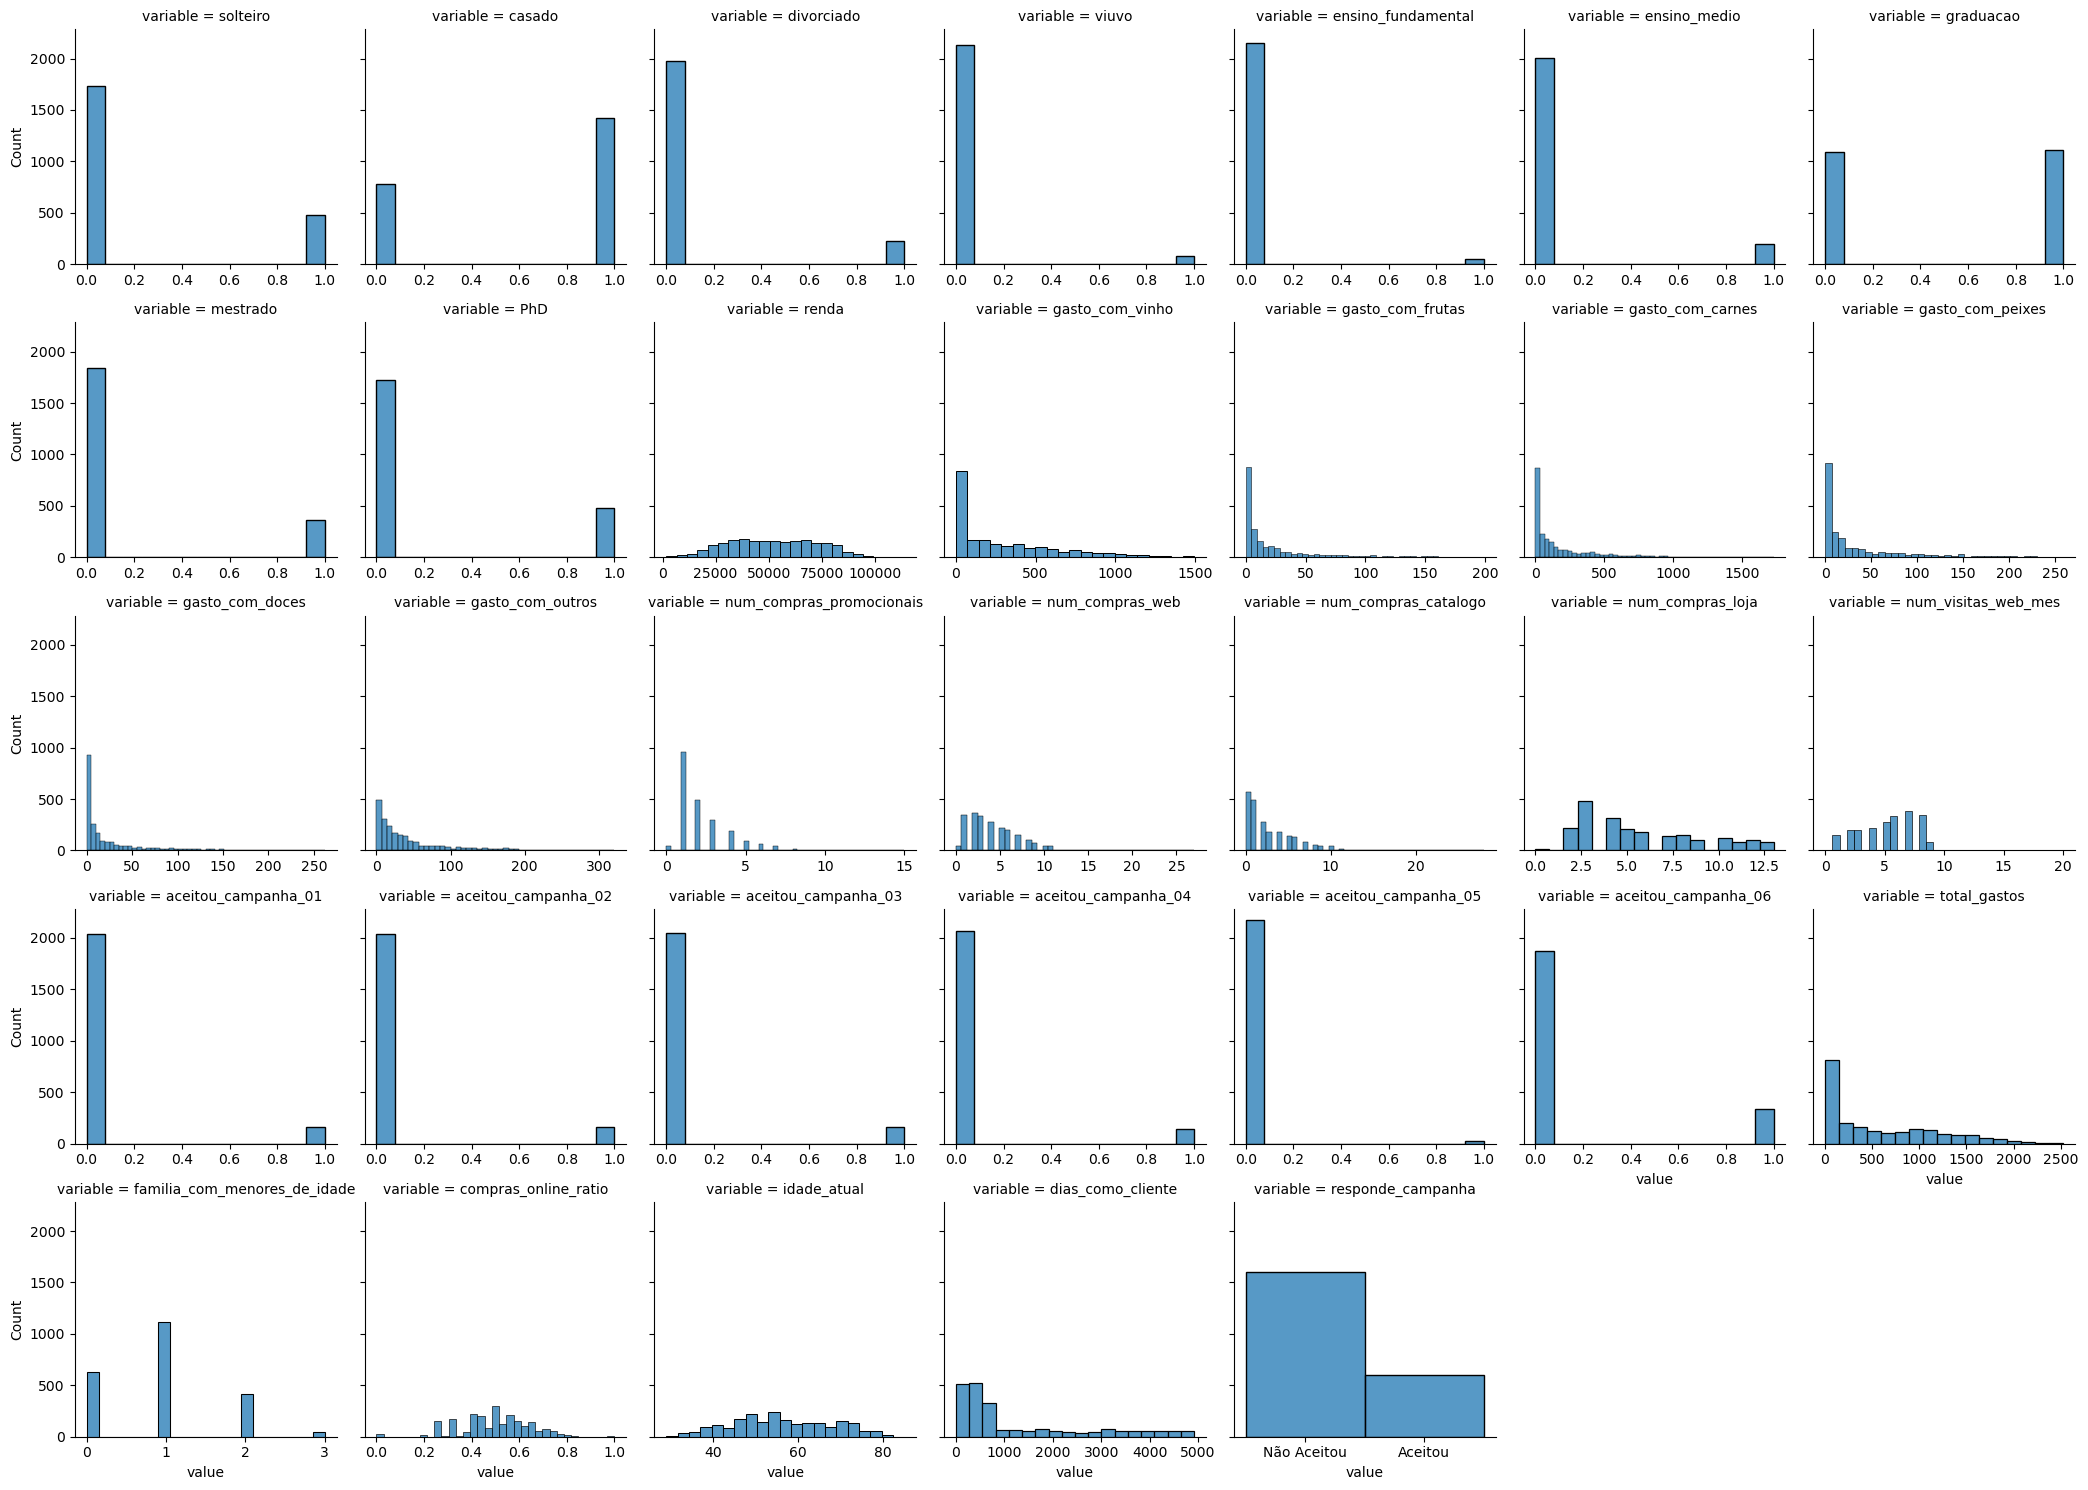

In [58]:
# Transforma o DataFrame de formato wide para long, mantendo todas as colunas como variáveis de valor.
# Isso facilita a visualização de distribuições de múltiplas variáveis numéricas com gráficos.
hist = pd.melt(dataset, value_vars=dataset)

# Cria uma grade de gráficos com seaborn, separando cada variável derretida ('variable') em uma subplot.
# col_wrap=5 define no máximo 5 colunas por linha, e sharex=False garante eixos X independentes.
hist = sns.FacetGrid(hist, col='variable', col_wrap=7, sharex=False)

# Mapeia a função 'sns.histplot' para cada Faceta da grade.
# Plota um histograma para a coluna 'value' em cada subplot.
hist.map(sns.histplot, 'value')


## 5.2 Proporção de Clientes que Aceitaram ou Não

In [59]:
dataset['responde_campanha'].value_counts()

responde_campanha
Não Aceitou    1601
Aceitou         604
Name: count, dtype: int64

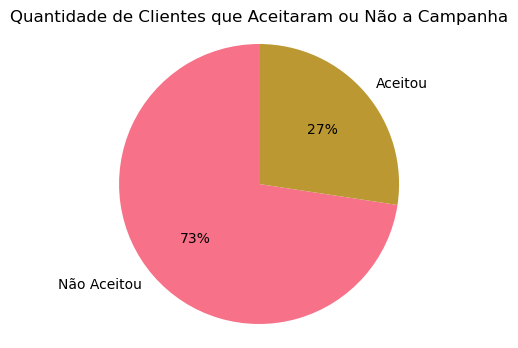

In [60]:
# Cria uma figura (fig) e um eixo (ax) para plotagem, definindo o tamanho da figura como 6 polegadas de largura e 4 de altura
fig, ax = plt.subplots(figsize=(6,4))

# Conta quantas vezes cada categoria aparece na coluna 'responde_campanha' do dataset
# Exemplo de categorias: 'Aceitou' e 'Não Aceitou'
dados_de_ocorrencia = dataset['responde_campanha'].value_counts()

# Extrai as categorias ('Aceitou', 'Não Aceitou') em formato de lista para servir como etiquetas do gráfico
etiquetas = dados_de_ocorrencia.index.tolist()

# Define uma paleta de cores vibrantes utilizando o esquema 'husl' (hue, saturation, lightness)
cor_do_grafico = sns.color_palette('husl')

# Plota o gráfico de pizza (pie chart) com as seguintes configurações:
# - dados_de_ocorrencia: valores a serem plotados (quantidade de cada categoria)
# - labels: etiquetas correspondentes aos valores
# - colors: cores atribuídas às fatias
# - autopct: formatação da porcentagem exibida (número inteiro)
# - startangle=90: começa o desenho do gráfico a partir do topo (ângulo de 90 graus)
ax.pie(dados_de_ocorrencia, labels=etiquetas, colors=cor_do_grafico, autopct='%.0f%%', startangle=90)

# Define o título do gráfico explicando o que ele representa
ax.set_title('Quantidade de Clientes que Aceitaram ou Não a Campanha')

# Ajusta a escala dos eixos para serem iguais, garantindo que o gráfico seja um círculo perfeito
ax.axis('equal')   

# Exibe o gráfico na tela
plt.show()


---

<span style="font-size: 26px;">Análise da Distribuição da Resposta à Campanha:</span>

1. **Maioria dos clientes não aceitou a campanha:**
   - Cerca de **73%** dos clientes **não aceitaram** a campanha de marketing.
   - Isso sugere uma **baixa taxa de conversão** ou eficácia da campanha.

2. **Apenas 27% aceitaram:**
   - Apenas **27% dos clientes foram impactados positivamente** ou se interessaram pela campanha.
   - Pode indicar que a **mensagem, o canal ou o timing da campanha não foram eficazes para a maioria**.

3. **O desequilíbrio entre as respostas**:
   - O gráfico mostra um claro **desequilíbrio de classes** que deve ser levado em consideração se o objetivo for treinar um modelo preditivo.
   - Métodos como **reestruturação dos dados** (oversampling/undersampling) ou o uso de **métricas balanceadas** (como F1-score) serão importantes nesse cenário, caso seja utilizado.

4. **Necessidade de investigação mais profunda:**
   - Recomendável analisar quais **variáveis explicativas (renda, escolaridade, canal de contato etc.)** têm maior correlação com a aceitação.
   - Isso ajudará a segmentar melhor os clientes e personalizar futuras campanhas.

---

**Conclusão:**

Como o gráfico revela temos uma baixa taxa de conversão. Esse desequilíbrio expressivo sugere que, de maneira geral, a campanha não teve uma boa aceitação por parte da base de clientes.

Mesmo que o gráfico já apresenta com clareza essa tendência de baixa adesão, entraremos no detalhe de cada campanha individualmente. A prioridade passa a ser entender se há variáveis explicativas relevantes que justifiquem essa baixa aceitação.

Caso não sejam encontradas variáveis que expliquem esse comportamento de forma significativa, é possível que o perfil demográfico, renda, canal de contato e frequência de compras índice de resposta (ratio) obtido realmente reflita uma tendência natural da base de clientes. Nessa situação, pode ser mais eficaz reavaliar a estratégia de abordagem de campanhas, testando novos canais, segmentações ou formatos de comunicação.

---

## 5.3 Taxa de Sucesso de Cada Uma das 6 Campanhas

In [61]:
# Define uma lista com os nomes das colunas que indicam aceitação nas campanhas de marketing 01 a 06
dados_campanhas = [
    'aceitou_campanha_01',
    'aceitou_campanha_02',
    'aceitou_campanha_03',
    'aceitou_campanha_04',
    'aceitou_campanha_05',
    'aceitou_campanha_06',
]

# Calcula a média de aceitação por campanha (proporção de clientes que aceitaram), multiplica por 100 para obter em percentual
# Cria um DataFrame chamado 'campanhas' com duas colunas: nome da campanha e percentual
campanhas = pd.DataFrame(dataset[dados_campanhas].mean() * 100, columns=['Percent']).reset_index()

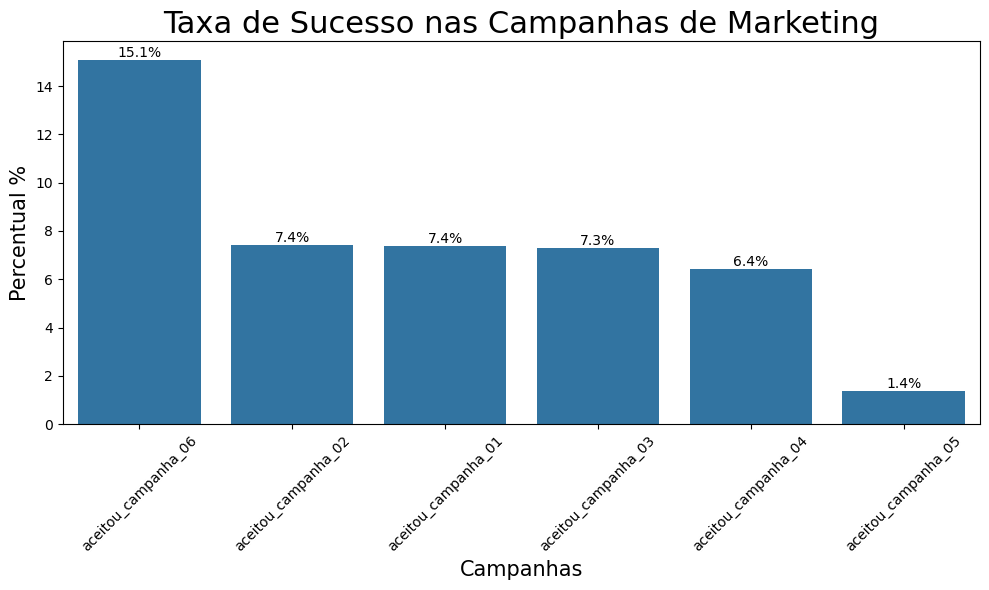

In [62]:
# Cria uma nova figura com tamanho de 10x6 polegadas
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras com seaborn
# x = nomes das campanhas, y = percentual de aceitação
# Ordena os dados de forma decrescente com base na taxa de sucesso (Percent)
ax = sns.barplot(
    x='index', 
    y='Percent', 
    data=campanhas.sort_values('Percent', ascending=False)
)
# Define os rótulos dos eixos com tamanho de fonte 15
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)

# Define o título do gráfico com tamanho de fonte 22
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size=22)
# Adiciona rótulos de texto acima de cada barra com o valor percentual (com 1 casa decimal)
# Isso facilita a leitura direta dos valores no gráfico
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',  # Texto com o valor da altura da barra
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição central acima da barra
        ha='center',  # Alinhamento horizontal centralizado
        va='bottom'   # Alinhamento vertical inferior (logo acima da barra)
    )
# Gira os rótulos do eixo X em 45 graus para evitar sobreposição e melhorar a leitura
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajusta automaticamente o layout da figura para que os elementos não fiquem cortados
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()

---

**Resumo do Gráfico**

* **Campanha 06** teve o melhor desempenho, com **15,1%** de aceitação.
* **Campanhas 01, 02 e 03** ficaram próximas, entre **7,3% e 7,4%**.
* **Campanha 04** teve **6,4%**.
* **Campanha 05** teve o pior resultado, com apenas **1,4%**.

**Conclusão rápida:** Campanha 06 foi a mais eficaz. Campanha 05 precisa ser revista. As demais estão em nível intermediário, com espaço para melhorias.

---



## 5.4 Temos uma Relação Entre o Gasto Total e Resposta às Campanhas de Marketing?

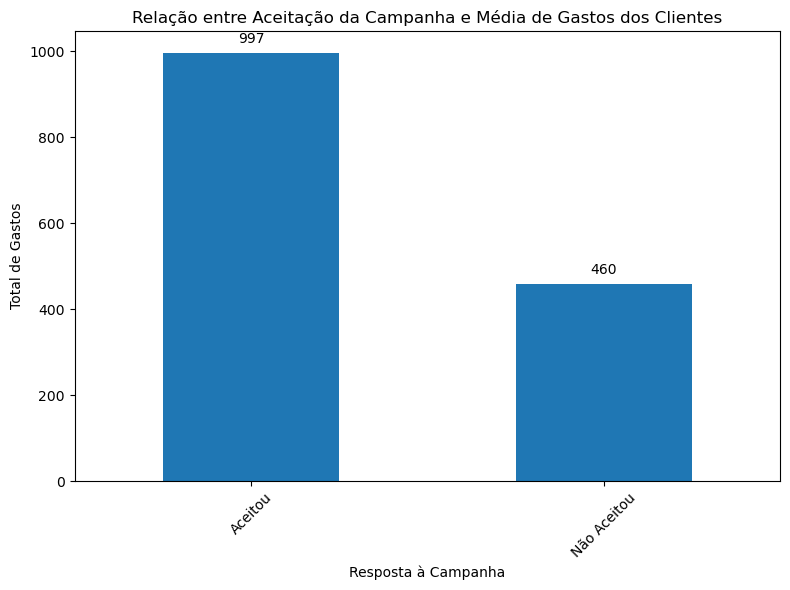

In [63]:
## Define o tamanho da figura como 8x6 polegadas para boa visualização
plt.figure(figsize=(8, 6))

# Agrupa os dados pela coluna 'responde_campanha'
# Calcula a média dos gastos ('total_gastos') para cada grupo
# Cria um gráfico de barras com esses valores médios
grafico = dataset.groupby('responde_campanha')['total_gastos'].mean().plot(kind='bar')

# Define o título do gráfico
plt.title('Relação entre Aceitação da Campanha e Média de Gastos dos Clientes')

# Define os rótulos dos eixos Y e X corretamente
plt.ylabel('Total de Gastos')
plt.xlabel('Resposta à Campanha')
# Percorre todas as barras (retângulos verticais) do gráfico
# Cada 'p' representa um elemento do tipo 'patch' (barra individual)
for p in grafico.patches:
    # Adiciona uma anotação (texto) acima de cada barra no gráfico
    grafico.annotate(
        f"{p.get_height():.0f}",   # Formata a altura da barra (valor numérico) como número inteiro e transforma em string
        
        # Define a posição da anotação:
        # p.get_x() retorna a coordenada X da base da barra
        # p.get_width() / 2 centraliza o texto no meio da barra
        # p.get_height() é a altura da barra (valor numérico que será mostrado acima dela)
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',               # Define o alinhamento horizontal do texto como centralizado em relação ao X
        va='center',               # Define o alinhamento vertical do texto como centralizado em relação ao Y (ajustado pelo xytext)
        xytext=(0, 10),            # Adiciona um deslocamento de 10 pontos para cima em relação à altura da barra
                                   # Isso evita que o texto fique exatamente "encostado" na barra
        textcoords='offset points' # Define que o deslocamento (xytext) será medido em pontos, não em coordenadas do gráfico
    )

# Gira os rótulos do eixo X para melhor legibilidade (caso tenha nomes longos)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)

# Ajusta automaticamente o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 5.5 Existe Relação Entre Idade e Gastos?

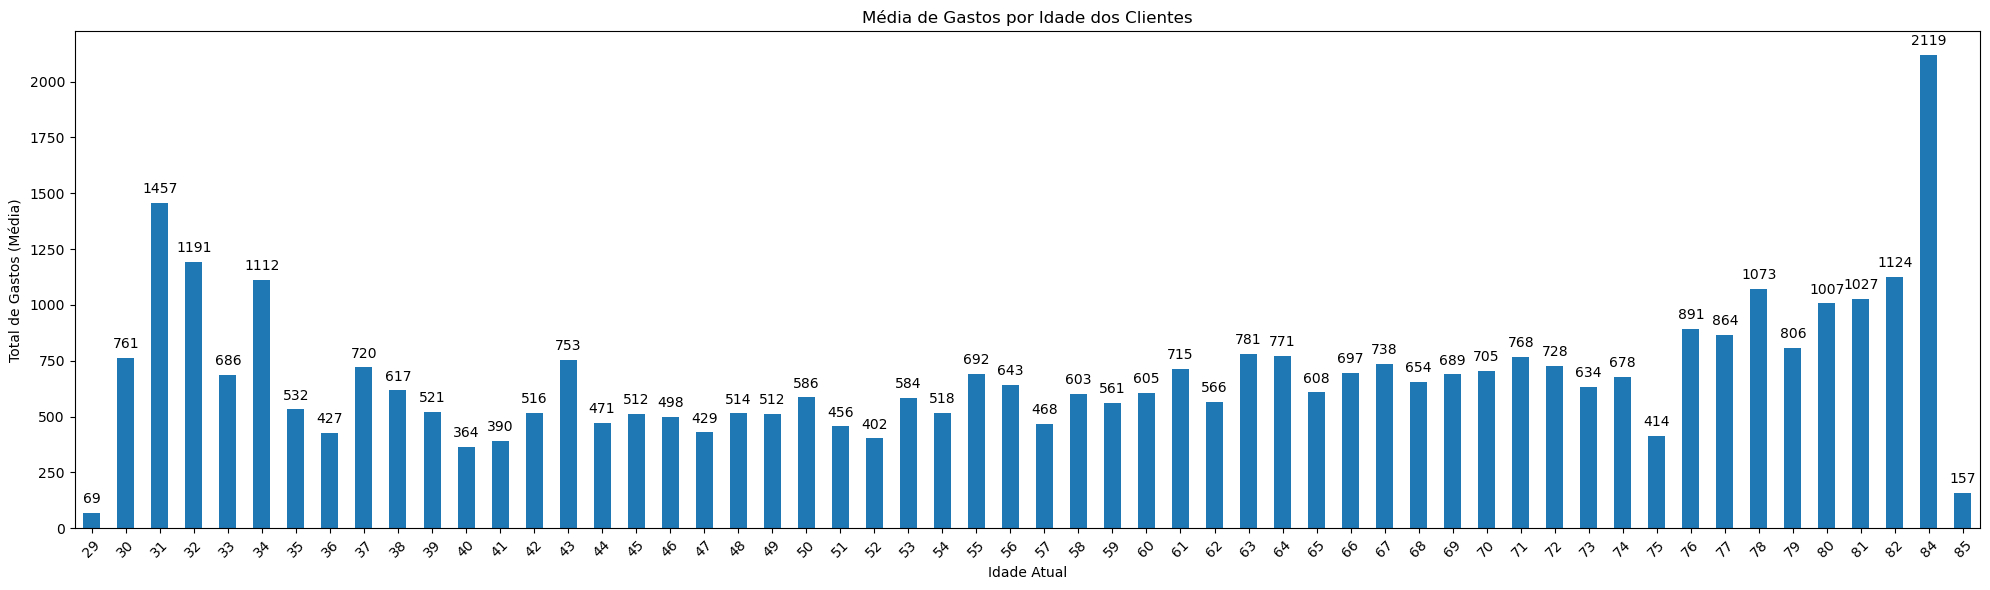

In [64]:
# Define o tamanho da figura como 20x6 polegadas — ideal para visualização horizontal com muitas idades
plt.figure(figsize=(20, 6))

# Agrupa os dados pela idade atual do cliente ('idade_atual')
# Calcula a média dos gastos ('total_gastos') para cada idade
# Cria um gráfico de barras (bar plot) com essas médias
grafico = dataset.groupby('idade_atual')['total_gastos'].mean().plot(kind='bar')

# Define o título principal do gráfico
plt.title('Média de Gastos por Idade dos Clientes')

# Define os rótulos dos eixos
plt.ylabel('Total de Gastos (Média)')
plt.xlabel('Idade Atual')

# Percorre todas as barras (retângulos verticais) do gráfico
# Cada 'p' representa um elemento do tipo 'patch' (barra individual)
for p in grafico.patches:
    # Adiciona uma anotação (texto) acima de cada barra no gráfico
    grafico.annotate(
        f"{p.get_height():.0f}",   # Formata a altura da barra (valor numérico) como número inteiro e transforma em string
        
        # Define a posição da anotação:
        # p.get_x() retorna a coordenada X da base da barra
        # p.get_width() / 2 centraliza o texto no meio da barra
        # p.get_height() é a altura da barra (valor numérico que será mostrado acima dela)
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',               # Define o alinhamento horizontal do texto como centralizado em relação ao X
        va='center',               # Define o alinhamento vertical do texto como centralizado em relação ao Y (ajustado pelo xytext)
        xytext=(0, 10),            # Adiciona um deslocamento de 10 pontos para cima em relação à altura da barra
                                   # Isso evita que o texto fique exatamente "encostado" na barra
        textcoords='offset points' # Define que o deslocamento (xytext) será medido em pontos, não em coordenadas do gráfico
    )

# Gira os rótulos do eixo X para melhor legibilidade (caso tenha nomes longos)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)
# Ajusta automaticamente o layout
plt.tight_layout()
# Exibe o gráfico
plt.show()

---

**Resumo: Como a Idade Impacta os Gastos?**

* **Não há padrão fixo**: os gastos variam bastante entre idades.
* **31, 34 e 84 anos** tiveram os maiores gastos médios.
* **30 a 40 anos** são muito ativos, mas com grande variação nos valores.
* **Idosos (75 a 82 anos)** também gastam bem, mostrando relevância econômica.
* **Idades com poucos registros (84, 85)** devem ser analisadas com cautela.
* Os dados mostram um perfil de consumo **heterogêneo**, sem uma tendência clara de idade = maior gasto.

---

## 5.6 Existe Correlação Entre Idade e Gastos Totais dos Clientes?

In [65]:
# Remove do dataset as colunas irrelevantes ou categóricas para a análise de correlação numérica
# Mantém apenas variáveis numéricas contínuas relacionadas a gasto e comportamento de compra
correlacao_dados = dataset.drop([
    'solteiro',                 # Variável categórica sobre estado civil (não é numérica contínua)
    'casado',                   # Variável categórica sobre estado civil
    'divorciado',               # Variável categórica sobre estado civil
    'viuvo',                    # Variável categórica sobre estado civil
    'ensino_fundamental',       # Nível educacional categórico
    'ensino_medio',             # Nível educacional categórico
    'graduacao',                # Nível educacional categórico
    'mestrado',                 # Nível educacional categórico
    'PhD',                      # Nível educacional categórico
    'aceitou_campanha_01',      # Respostas binárias a campanhas de marketing (não queremos misturar)
    'aceitou_campanha_02',      # Respostas binárias
    'aceitou_campanha_03',      # Respostas binárias
    'aceitou_campanha_04',      # Respostas binárias
    'aceitou_campanha_05',      # Respostas binárias
    'aceitou_campanha_06',      # Respostas binárias
    'familia_com_menores_de_idade',  # Variável derivada (não diretamente relevante para gasto médio por idade)
    'responde_campanha'          # Resposta à campanha, variável categórica/binarizada
], axis=1).corr()                # Calcula a matriz de correlação apenas entre as variáveis numéricas restantes
                                 # A correlação mostra como essas variáveis estão linearmente associadas entre si

In [66]:
correlacao_idade = correlacao_dados.loc['idade_atual']

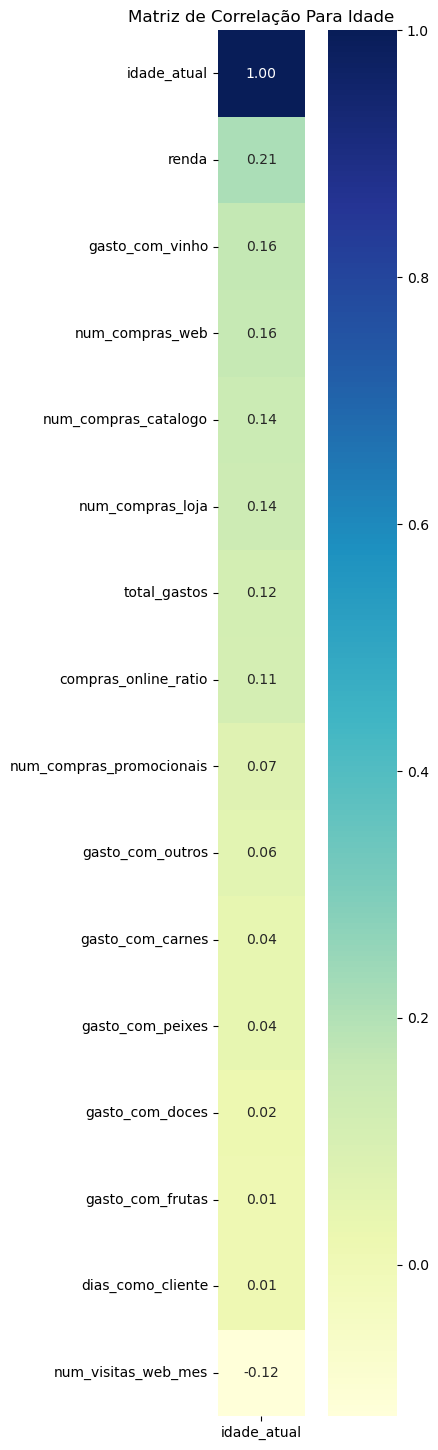

In [67]:
# Plot
# Cria uma nova figura com tamanho especificado (6x18 polegadas)
plt.figure(figsize=(6, 18))

# Cria um mapa de calor utilizando seaborn
# 'pd.DataFrame(column_corr.sort_values(ascending=False))' ordena os valores de correlação em ordem decrescente e cria um DataFrame
sns.heatmap(pd.DataFrame(correlacao_idade.sort_values(ascending=False)), 
            annot=True,         # 'annot=True' adiciona anotações (valores) nas células do mapa de calor
            cmap='YlGnBu',      # 'cmap=copper' define o esquema de cores do mapa de calor para 'inferno'
            cbar=True,          # 'cbar=True' exibe a barra de cores ao lado do mapa de calor
            square=True,        # 'square=True' ajusta as células do mapa de calor para serem quadradas
            fmt='.2f')          # 'fmt=.2f' formata os números anotados com duas casas decimais
# Define o título do mapa de calor
plt.title('Matriz de Correlação Para Idade')

# Exibe o gráfico
plt.show()

<span style="font-size: 26px;">heatmap de correlação com `idade_atual`, podemos tirar algumas conclusões importantes:</span>

---
- A **idade** tem **pouca influência direta e isolada** sobre os principais comportamentos de consumo.
- Existe **uma leve associação com renda e compras online**, o que pode ser usado em estratégias segmentadas.
---



## 5.7 Existe Relação Entre Renda e Gasto Total?

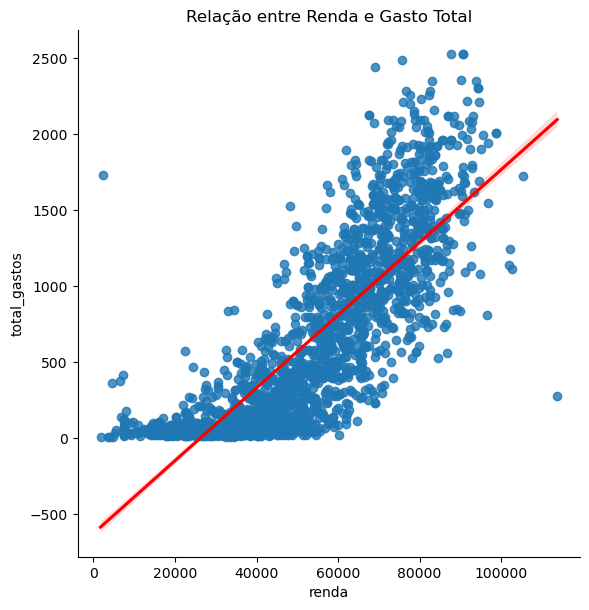

In [68]:
# Cria um gráfico de dispersão com linha de regressão entre 'renda' e 'total_gastos'
sns.lmplot(
    x='renda',                      # Eixo X: renda dos clientes
    y='total_gastos',              # Eixo Y: soma de todos os gastos
    data=dataset,                  # Fonte dos dados
    line_kws={'color': 'red'},     # Cor da linha de regressão
    height=6,                      # Altura da figura
    aspect=1                       # Proporção largura/altura
)
# Adiciona título ao gráfico (precisa usar plt.title depois do lmplot)
plt.title('Relação entre Renda e Gasto Total')
# Exibe o gráfico
plt.show()

O gráfico mostra que há uma **relação positiva** entre renda e total de gastos:  
➡️ **quanto maior a renda, maior tende a ser o gasto.**

No entanto, a **dispersão é alta**, o que indica que **renda sozinha não explica totalmente o comportamento de consumo**.  
Outros fatores influenciam.

## 5.8 Existe Algum Fator que Explica a Decisão do Cliente em Aceitar as Campanhas?

In [69]:
dataset.columns

Index(['solteiro', 'casado', 'divorciado', 'viuvo', 'ensino_fundamental',
       'ensino_medio', 'graduacao', 'mestrado', 'PhD', 'renda',
       'gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
       'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
       'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
       'num_compras_loja', 'num_visitas_web_mes', 'aceitou_campanha_01',
       'aceitou_campanha_02', 'aceitou_campanha_03', 'aceitou_campanha_04',
       'aceitou_campanha_05', 'aceitou_campanha_06', 'total_gastos',
       'familia_com_menores_de_idade', 'compras_online_ratio', 'idade_atual',
       'dias_como_cliente', 'responde_campanha'],
      dtype='object')

In [70]:
# Remove colunas relacionadas aos gastos com produtos específicos,
# número de compras em diferentes canais e respostas às campanhas.
# O objetivo é manter apenas as variáveis que serão usadas como preditoras.
variavel_x = dataset.drop(['gasto_com_vinho', 'gasto_com_frutas', 'gasto_com_carnes',
                           'gasto_com_peixes', 'gasto_com_doces', 'gasto_com_outros',
                           'num_compras_web', 'num_compras_catalogo','num_compras_loja', 
                           'aceitou_campanha_01', 'aceitou_campanha_02', 'aceitou_campanha_03', 
                           'aceitou_campanha_04','aceitou_campanha_05', 'aceitou_campanha_06', 
                           'responde_campanha'], axis=1) # axis=1 indica que estamos removendo colunas

In [71]:
# Cria a variável alvo (variavel_y) a partir da coluna 'responde_campanha'
# Mapeia os valores de texto para valores numéricos:
# 'Não Aceitou' é convertido para 0 e 'Aceitou' para 1
variavel_y = dataset['responde_campanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [72]:
# Cria um modelo de classificação usando Floresta Aleatória (Random Forest)
# O parâmetro random_state=40 garante reprodutibilidade dos resultados
modelo_floresta_aleatoria = RandomForestClassifier(random_state=40)

In [73]:
# Treina o modelo de Floresta Aleatória usando as variáveis preditoras (variavel_x)
# e a variável alvo (variavel_y)
modelo_treino = modelo_floresta_aleatoria.fit(variavel_x, variavel_y)

In [74]:
# Obtém a importância relativa de cada variável preditora no modelo treinado
# Isso ajuda a entender quais variáveis mais influenciaram a decisão do modelo
variaveis_importantes = modelo_treino.feature_importances_

In [75]:
# Calcula o desvio padrão da importância das variáveis entre todas as árvores da floresta
# Isso permite avaliar a variabilidade da importância das features entre os estimadores
desvio_padrao = np.std([arvore.feature_importances_ for arvore in modelo_treino.estimators_], axis=0)

In [76]:
# Obtém os índices das variáveis ordenadas da menos importante para a mais importante
# Essa ordenação é útil para criar gráficos ou tabelas de importância de variáveis
indices = np.argsort(variaveis_importantes)

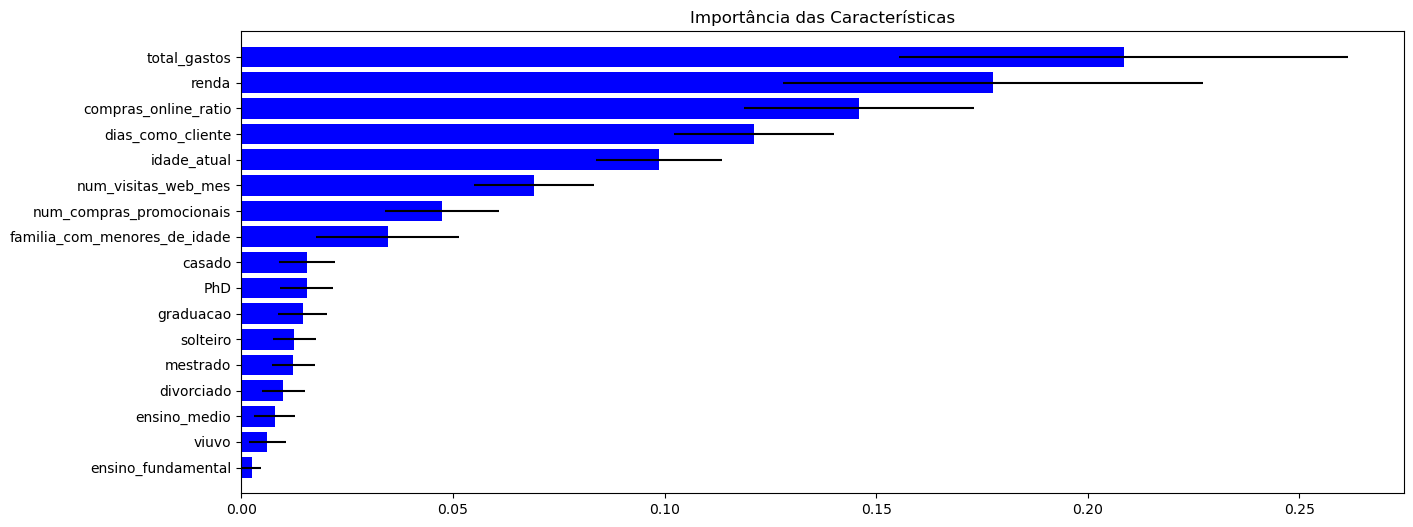

In [77]:
# Plot
# Cria uma nova figura com tamanho 11x10 polegadas
plt.figure(1, figsize=(15, 6))

# Define o título do gráfico
plt.title("Importância das Características")

# Cria um gráfico de barras horizontais (barh) com as importâncias das variáveis
# As barras são ordenadas com base nos índices ordenados (da menos para a mais importante)
# 'xerr' adiciona barras de erro usando o desvio padrão das importâncias
plt.barh(
    range(variavel_x.shape[1]),                # Posições no eixo Y
    variaveis_importantes[indices],            # Importâncias ordenadas
    color="b",                                 # Cor
    xerr=desvio_padrao[indices],               # Desvio padrão como barra de erro
    align="center"                             # Centraliza as barras na posição
)

# Define os rótulos do eixo Y com os nomes das variáveis preditoras, também ordenadas
plt.yticks(range(variavel_x.shape[1]), variavel_x.columns[indices])

# Define os limites do eixo Y
plt.ylim([-1, variavel_x.shape[1]])

# Exibe o gráfico
plt.show()

---

<span>Resumo da Análise da Importância das Variáveis</span>

O gráfico mostra quais variáveis mais influenciaram o modelo de Floresta Aleatória na previsão de quem aceitou uma campanha.

* As variáveis **mais importantes** foram:

  * `total_gastos`: principal fator para o modelo. Clientes que gastam mais tendem a aceitar campanhas.
  * `renda`: também muito relevante, pois influencia a capacidade de consumo.
  * `compras_online_ratio` e `dias_como_cliente`: mostram que o comportamento de compra online e a fidelidade ao longo do tempo são bons indicativos.

* As variáveis **com importância média**:

  * `idade_atual`, `num_visitas_web_mes`, `num_compras_promocionais`: têm alguma influência, mas menor que as primeiras.

* As variáveis **menos relevantes**:

  * Estado civil (`casado`, `solteiro`, etc.) e escolaridade (`PhD`, `ensino_medio`, etc.) quase não influenciaram o modelo.

* As **barras pretas** representam a variação da importância entre as árvores da floresta. Quanto maiores, mais divergência houve entre as árvores sobre a relevância da variável.

---

**Conclusão**

O modelo se apoia principalmente em **comportamento de consumo** e **renda** para tomar decisões, enquanto características demográficas como **estado civil e escolaridade** têm pouco peso. Isso sugere que campanhas de marketing podem ser melhor direcionadas com foco em hábitos de compra e perfil financeiro, em vez de dados demográficos.

---

 

# 6.0 Escolhendo e Aplicando o Teste de Hipóteses

---

**Seleção das Variáveis e Avaliação Estatística**

Para identificar os fatores que mais influenciam a aceitação de campanhas pelos clientes, foi utilizado um modelo de **Floresta Aleatória**, que gerou um gráfico com a **importância relativa das variáveis**, considerando a média e o desvio padrão da contribuição de cada uma nas árvores da floresta.

Com base nesse gráfico, foram selecionadas as **três variáveis mais relevantes**:

* `total_gastos`
* `renda`
* `dias_como_cliente`

Essas variáveis apresentaram **alta importância preditiva** e **baixa variabilidade entre os estimadores**, indicando que consistentemente impactam a decisão dos clientes em aceitar ou não a campanha.

---

## 6.1 Preparando os Grupos Para o Teste de Normalidade

In [78]:
# Filtra o DataFrame original 'dataset' para criar o grupo 1,
# contendo apenas os registros em que a resposta à campanha foi "Não Aceitou"
grupo_1 = dataset[dataset['responde_campanha'] == 'Não Aceitou']

# Filtra o DataFrame original 'dataset' para criar o grupo 2,
# contendo apenas os registros em que a resposta à campanha foi "Aceitou"
grupo_2 = dataset[dataset['responde_campanha'] == 'Aceitou']

## 6.2 Teste de Normalidade (Shapiro-Wilk) Para a Renda

In [79]:
from scipy.stats import shapiro

# Aplica o teste de Shapiro-Wilk ao grupo que **não aceitou** a campanha,
# avaliando se a distribuição da variável 'renda' é normal.
teste_shapiro_g1_renda = shapiro(grupo_1['renda'])

# Aplica o teste de Shapiro-Wilk ao grupo que **aceitou** a campanha,
# também para verificar se a distribuição da variável 'renda' segue uma normal.
teste_shapiro_g2_renda = shapiro(grupo_2['renda'])


In [80]:
teste_shapiro_g1_renda, teste_shapiro_g2_renda

(ShapiroResult(statistic=0.9843205319164767, pvalue=3.377318256260812e-12),
 ShapiroResult(statistic=0.965155272988923, pvalue=8.833879424410014e-11))

In [81]:
# Define o nível de significância
nivel_significancia = 0.05

# Verifica normalidade dos dois grupos com os valores p
if teste_shapiro_g1_renda.pvalue <= nivel_significancia:
    print(f"O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_renda.pvalue}")
else:
    print(f"O grupo 01 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_renda.pvalue}")

if teste_shapiro_g2_renda.pvalue <= nivel_significancia:
    print(f"O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_renda.pvalue}")
else:
    print(f"O grupo 02 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_renda.pvalue}")



O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = 3.377318256260812e-12
O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = 8.833879424410014e-11


---

**Resumo do Teste de Normalidade - `renda`**

Foi aplicado o teste de Shapiro-Wilk à variável **`renda`** para avaliar se os grupos de clientes que **aceitaram** e **não aceitaram** a campanha seguem uma distribuição normal.

* **Grupo 01 (Não Aceitou):** p-valor = 3.38 × 10⁻¹²
* **Grupo 02 (Aceitou):** p-valor = 8.83 × 10⁻¹¹

Como ambos os p-valores são **menores que 0.05**, rejeita-se a hipótese nula de normalidade.

**Conclusão:**
Os dois grupos **não seguem uma distribuição normal**, portanto, para comparar as médias da variável `renda` entre eles, é mais apropriado utilizar um **teste não paramétrico**, como o **Mann-Whitney**.

---

## 6.3 Teste de Normalidade (Shapiro-Wilk) Para a Total de Gastos

In [82]:
# Aplica o teste de Shapiro-Wilk ao grupo que **não aceitou** a campanha,
# avaliando se a distribuição da variável 'total_gastos' é normal.
teste_shapiro_g1_total_gastos = shapiro(grupo_1['total_gastos'])

# Aplica o teste de Shapiro-Wilk ao grupo que **aceitou** a campanha,
# também para verificar se a distribuição da variável 'total_gastos' segue uma normal.
teste_shapiro_g2_total_gastos = shapiro(grupo_2['total_gastos'])

In [83]:
# Define o nível de significância
nivel_significancia = 0.05

# Verifica normalidade dos dois grupos com os valores p
if teste_shapiro_g1_total_gastos.pvalue <= nivel_significancia:
    print(f"O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_total_gastos.pvalue}")
else:
    print(f"O grupo 01 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_total_gastos.pvalue}")

if teste_shapiro_g2_total_gastos.pvalue <= nivel_significancia:
    print(f"O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_total_gastos.pvalue}")
else:
    print(f"O grupo 02 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_total_gastos.pvalue}")

O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = 5.71155242649534e-38
O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = 1.3352807444989823e-14


---

**Resumo do Teste de Normalidade – `total_gastos`**

O teste de Shapiro-Wilk foi aplicado para avaliar se a variável `total_gastos` segue uma distribuição normal nos dois grupos de clientes:

* **Grupo 01 (Não Aceitou):** p-valor = 5.71 × 10⁻³⁸
* **Grupo 02 (Aceitou):** p-valor = 1.33 × 10⁻¹⁴

Ambos os p-valores são significativamente menores que 0.05, indicando que **nenhum dos grupos segue distribuição normal**.

**Conclusão:**
A variável `total_gastos` apresenta **distribuição não normal** em ambos os grupos. Por isso, análises comparativas entre os grupos devem utilizar **testes não paramétricos**, como o **teste de Mann-Whitney**.

--- 

## 6.4 Teste de Normalidade (Shapiro-Wilk) Para Ratio de Compras Online

In [84]:
# Aplica o teste de Shapiro-Wilk ao grupo que **não aceitou** a campanha,
# avaliando se a distribuição da variável 'compras_online_ratio' é normal.
teste_shapiro_g1_compras_online_ratio = shapiro(grupo_1['compras_online_ratio'])

# Aplica o teste de Shapiro-Wilk ao grupo que **aceitou** a campanha,
# também para verificar se a distribuição da variável 'compras_online_ratio' segue uma normal.
teste_shapiro_g2_dias_compras_online_ratio = shapiro(grupo_2['compras_online_ratio'])

In [85]:
# Define o nível de significância
nivel_significancia = 0.05

# Verifica normalidade dos dois grupos com os valores p
if teste_shapiro_g1_compras_online_ratio.pvalue <= nivel_significancia:
    print(f"O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_compras_online_ratio.pvalue}")
else:
    print(f"O grupo 01 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_compras_online_ratio.pvalue}")

if teste_shapiro_g2_dias_compras_online_ratio.pvalue <= nivel_significancia:
    print(f"O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_dias_compras_online_ratio.pvalue}")
else:
    print(f"O grupo 02 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_dias_compras_online_ratio.pvalue}")

O grupo 01 **segue** uma distribuição normal. Resultado: p-valor = nan
O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = 0.0009750330850361839


## 6.5 Teste de Normalidade (Shapiro-Wilk) Para a Dias Como Cliente

In [86]:
# Aplica o teste de Shapiro-Wilk ao grupo que **não aceitou** a campanha,
# avaliando se a distribuição da variável 'dias_como_cliente' é normal.
teste_shapiro_g1_dias_como_cliente = shapiro(grupo_1['dias_como_cliente'])

# Aplica o teste de Shapiro-Wilk ao grupo que **aceitou** a campanha,
# também para verificar se a distribuição da variável 'dias_como_cliente' segue uma normal.
teste_shapiro_g2_dias_como_cliente = shapiro(grupo_2['dias_como_cliente'])

In [87]:
# Define o nível de significância
nivel_significancia = 0.05

# Verifica normalidade dos dois grupos com os valores p
if teste_shapiro_g1_dias_como_cliente.pvalue <= nivel_significancia:
    print(f"O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_dias_como_cliente.pvalue}")
else:
    print(f"O grupo 01 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g1_dias_como_cliente.pvalue}")

if teste_shapiro_g2_dias_como_cliente.pvalue <= nivel_significancia:
    print(f"O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_dias_como_cliente.pvalue}")
else:
    print(f"O grupo 02 **segue** uma distribuição normal. Resultado: p-valor = {teste_shapiro_g2_dias_como_cliente.pvalue}")

O grupo 01 **não segue** uma distribuição normal. Resultado: p-valor = 2.184284681136851e-41
O grupo 02 **não segue** uma distribuição normal. Resultado: p-valor = 1.1735367468653652e-27


---

**Resumo do Teste de Normalidade – `dias_como_cliente`**

O teste de Shapiro-Wilk foi aplicado à variável `dias_como_cliente` para verificar a normalidade em ambos os grupos de clientes:

* **Grupo 01 (Não Aceitou):** p-valor = 2.18 × 10⁻⁴¹
* **Grupo 02 (Aceitou):** p-valor = 1.17 × 10⁻²⁷

Ambos os p-valores são extremamente baixos, muito abaixo do nível de significância de 0.05, o que indica violação clara da hipótese de normalidade.

**Conclusão:**
A variável `dias_como_cliente` **não segue uma distribuição normal** em nenhum dos grupos. Assim, qualquer comparação entre os grupos deve ser feita utilizando **testes não paramétricos**, como o **teste de Mann-Whitney**.

---

### Conclusão do Teste de Normalidade 

---

**Teste de Normalidade e Escolha Metodológica**

Antes de aplicar os testes de hipótese, foi realizado o **Teste de Shapiro-Wilk** para verificar se as distribuições dessas variáveis seguem uma distribuição normal em cada grupo (aceitou vs. não aceitou a campanha). O resultado foi claro:

* As variáveis `total_gastos`, `renda` e `dias_como_cliente` **não seguem distribuição normal** em nenhum dos grupos (p-valores < 0,05).

Dessa forma, decidiu-se aplicar o **teste não paramétrico de Mann-Whitney**, que é apropriado para comparar amostras independentes quando não há normalidade, com o objetivo de verificar se há **diferença estatisticamente significativa entre os grupos** em relação a essas variáveis.

---

**Conclusão Parcial:**
A seleção das variáveis com base na **importância no modelo de machine learning** combinada com a **verificação estatística de normalidade** garante uma análise robusta. O uso do teste de Mann-Whitney oferece evidências confiáveis sobre o impacto de `total_gastos`, `renda` e `dias_como_cliente` na decisão dos clientes frente às campanhas.

---

## 6.6 Aplicando Teste de Hipóteses Não Paramétrico

---

**Aplicação do Teste de Mann-Whitney U**

Dando sequência à análise, utilizamos o **Teste de Mann-Whitney U** para comparar os grupos de clientes que aceitaram e não aceitaram a campanha com base nas variáveis selecionadas. Esse teste permite identificar se há **diferenças estatisticamente significativas na distribuição** dessas variáveis entre os dois grupos, **sem exigir a suposição de normalidade**.

A análise foi conduzida separadamente para cada uma das variáveis (`total_gastos`, `renda` e `dias_como_cliente`), possibilitando verificar **quais características apresentam comportamento diferenciado entre os públicos** e, consequentemente, podem estar associadas à decisão de aceitar ou não a campanha.

---

In [88]:
from scipy.stats import mannwhitneyu

# Define o nível de significância
nivel_significancia = 0.05

### 6.6.1 Aplicando Teste de Hipóteses Não Paramétrico para Renda

In [89]:
# Seleciona os valores da variável 'renda' para o grupo que NÃO aceitou a campanha
teste_mann_whitney_g1_renda = dataset[dataset['responde_campanha'] == 'Não Aceitou']['renda']
# Seleciona os valores da variável 'renda' para o grupo que ACEITOU a campanha
teste_mann_whitney_g2_renda = dataset[dataset['responde_campanha'] == 'Aceitou']['renda']

In [90]:
# Aplica o teste de Mann-Whitney U à variável 'renda'
# Compara dois grupos independentes:
# - teste_mann_whitney_g1_renda: clientes que NÃO aceitaram a campanha
# - teste_mann_whitney_g2_renda: clientes que ACEITARAM a campanha
# O objetivo é verificar se há diferença significativa nas distribuições de renda entre os dois grupos
resultado_renda = mannwhitneyu(teste_mann_whitney_g1_renda, teste_mann_whitney_g2_renda)

# Imprime um título indicando que o resultado a seguir é referente à variável 'renda'
print("🔍 Teste de Mann-Whitney - Renda")
# Exibe o valor da estatística U do teste de Mann-Whitney
# Essa estatística representa a soma das posições dos valores em um ranking combinado dos dois grupos
# Quanto mais distante do valor esperado sob a hipótese nula, maior a evidência contra ela
print(f"Estatística U = {resultado_renda.statistic:.2f}")
# Exibe o valor p (p-valor) com notação científica, com 5 casas decimais
# O p-valor indica a probabilidade de observar uma diferença igual ou maior entre os grupos
# assumindo que a hipótese nula (sem diferença) seja verdadeira
print(f"p-valor = {resultado_renda.pvalue:.5e}")
# Condicional para interpretar o resultado do teste com base no nível de significância (por exemplo, 0.05)
# Se o p-valor for menor ou igual ao nível de significância, rejeitamos a hipótese nula
# Isso indica que há evidência de que os grupos diferem quanto à variável 'renda'
if resultado_renda.pvalue <= nivel_significancia:
    print("Resultado: Diferença significativa entre os grupos em relação à renda.\n")
else:
    # Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula
    # Ou seja, não há evidência suficiente para afirmar que os grupos diferem quanto à renda
    print("Resultado: Não há diferença significativa entre os grupos em relação à renda.\n")

🔍 Teste de Mann-Whitney - Renda
Estatística U = 300608.50
p-valor = 7.99108e-43
Resultado: Diferença significativa entre os grupos em relação à renda.



---

**Análise do Teste de Mann-Whitney – `renda`**

O teste de Mann-Whitney U aplicado à variável `renda` revelou um **p-valor extremamente baixo** (p = 7.99 × 10⁻⁴³), muito inferior ao nível de significância estabelecido (0,05). Esse resultado indica uma **diferença estatisticamente significativa** entre os grupos de clientes que **aceitaram** e **não aceitaram** a campanha.

**Conclusão:**
A variável `renda` apresenta uma **influência relevante na decisão do cliente**, sugerindo que **níveis diferentes de renda estão associados a comportamentos distintos** frente à campanha. Portanto, `renda` deve ser considerada um **fator estratégico** tanto na análise quanto na segmentação de futuros públicos-alvo.

---

### 6.6.2 Aplicando Teste de Hipóteses Não Paramétrico para Total de Gastos

In [91]:
# Seleciona os valores da variável 'total_gastos' para o grupo que NÃO aceitou a campanha
teste_mann_whitney_g1_gastos = dataset[dataset['responde_campanha'] == 'Não Aceitou']['total_gastos']
# Seleciona os valores da variável 'total_gastos' para o grupo que ACEITOU a campanha
teste_mann_whitney_g2_gastos = dataset[dataset['responde_campanha'] == 'Aceitou']['total_gastos']

In [92]:
# Aplica o teste de Mann-Whitney U à variável 'total_gastos'
# Compara dois grupos independentes:
# - teste_mann_whitney_g1_gastos: clientes que NÃO aceitaram a campanha
# - teste_mann_whitney_g2_gastos: clientes que ACEITARAM a campanha
# O objetivo é verificar se há diferença estatisticamente significativa nos valores de 'total_gastos' entre os grupos
resultado_gastos = mannwhitneyu(teste_mann_whitney_g1_gastos, teste_mann_whitney_g2_gastos)

# Imprime um cabeçalho indicando que os resultados a seguir se referem ao teste para a variável 'total_gastos'
print("🔍 Teste de Mann-Whitney - Total de Gastos")
# Exibe o valor da estatística U do teste de Mann-Whitney
# Esse valor representa a soma dos postos (ranks) das observações de um dos grupos
# Quanto mais extremo for esse valor, maior a evidência de que há diferença entre os grupos
print(f"Estatística U = {resultado_gastos.statistic:.2f}")
# Exibe o p-valor do teste com notação científica
# O p-valor indica a probabilidade de observar uma diferença tão grande quanto a encontrada, 
# assumindo que a hipótese nula (de que os grupos são iguais) seja verdadeira
print(f"p-valor = {resultado_gastos.pvalue:.5e}")
# Interpretação do resultado com base no nível de significância (ex: 0.05)
# Se o p-valor for menor ou igual ao nível de significância, rejeitamos a hipótese nula
# Isso sugere que há uma diferença significativa no total de gastos entre os dois grupos
if resultado_gastos.pvalue <= nivel_significancia:
    print("Resultado: Diferença significativa entre os grupos em relação ao total de gastos.\n")
else:
    # Caso contrário, não há evidência suficiente para afirmar que os grupos diferem em relação ao total de gastos
    print("Resultado: Não há diferença significativa entre os grupos em relação ao total de gastos.\n")


🔍 Teste de Mann-Whitney - Total de Gastos
Estatística U = 254246.50
p-valor = 2.91040e-66
Resultado: Diferença significativa entre os grupos em relação ao total de gastos.



---

**Análise do Teste de Mann-Whitney – `total_gastos`**

A aplicação do teste de Mann-Whitney U para a variável `total_gastos` resultou em um **p-valor extremamente baixo** (p = 2.91 × 10⁻⁶⁶), o que fornece **forte evidência estatística contra a hipótese nula** de que não há diferença entre os grupos.

**Conclusão:**
Há uma **diferença estatisticamente significativa no total de gastos** entre os clientes que aceitaram e os que não aceitaram a campanha. Isso indica que **o nível de gastos é uma variável fortemente associada à aceitação**, o que a torna um **indicador valioso para análise comportamental e segmentação de campanhas**.

Esse resultado reforça a importância de incluir `total_gastos` em modelos preditivos e estratégias de marketing direcionadas.

---

### 6.6.3 Aplicando Teste de Hipóteses Não Paramétrico para Dias Como Cliente

In [93]:
# Seleciona os valores da variável 'dias_como_cliente' para o grupo que NÃO aceitou a campanha
teste_mann_whitney_g1_dias = dataset[dataset['responde_campanha'] == 'Não Aceitou']['dias_como_cliente']
# Seleciona os valores da variável 'dias_como_cliente' para o grupo que ACEITOU a campanha
teste_mann_whitney_g2_dias = dataset[dataset['responde_campanha'] == 'Aceitou']['dias_como_cliente']

In [94]:
# Aplica o teste de Mann-Whitney U à variável 'dias_como_cliente'
# Compara dois grupos independentes:
# - teste_mann_whitney_g1_dias: clientes que NÃO aceitaram a campanha
# - teste_mann_whitney_g2_dias: clientes que ACEITARAM a campanha
# O objetivo é verificar se há diferença significativa na quantidade de dias como cliente entre os grupos
resultado_dias = mannwhitneyu(teste_mann_whitney_g1_dias, teste_mann_whitney_g2_dias)
# Imprime o título indicando que os resultados a seguir correspondem à variável 'dias_como_cliente'
print("🔍 Teste de Mann-Whitney - Dias como Cliente")
# Exibe o valor da estatística U calculada no teste
# A estatística U é baseada na posição (ranking) dos valores combinados dos dois grupos
# Valores muito altos ou muito baixos indicam possível diferença entre os grupos
print(f"Estatística U = {resultado_dias.statistic:.2f}")
# Exibe o p-valor do teste em notação científica
# O p-valor indica a probabilidade de obter uma diferença tão extrema (ou mais) assumindo que não há diferença real (H₀ verdadeira)
print(f"p-valor = {resultado_dias.pvalue:.5e}")
# Interpretação do p-valor com base no nível de significância previamente definido (ex: 0.05)
# Se p ≤ 0.05, rejeita-se a hipótese nula → há evidência de diferença entre os grupos
if resultado_dias.pvalue <= nivel_significancia:
    print("Resultado: Diferença significativa entre os grupos em relação aos dias como cliente.\n")
else:
    # Se p > 0.05, não há evidência suficiente para afirmar que os grupos diferem quanto ao tempo como cliente
    print("Resultado: Não há diferença significativa entre os grupos em relação aos dias como cliente.\n")


🔍 Teste de Mann-Whitney - Dias como Cliente
Estatística U = 470583.00
p-valor = 3.32586e-01
Resultado: Não há diferença significativa entre os grupos em relação aos dias como cliente.



---

**Análise do Teste de Mann-Whitney – `dias_como_cliente`**

O teste de Mann-Whitney U aplicado à variável `dias_como_cliente` apresentou um **p-valor de 0.3326**, valor **bem acima** do nível de significância adotado (0,05). Isso indica que **não há evidência estatística suficiente para rejeitar a hipótese nula**.

**Conclusão:**
A variável `dias_como_cliente` **não apresenta diferença significativa** entre os grupos de clientes que aceitaram e não aceitaram a campanha. Ou seja, o tempo de relacionamento com a empresa **não parece influenciar diretamente a decisão do cliente** quanto à aceitação da ação de marketing analisada.

Esse resultado sugere que essa variável pode **não ser prioritária** na construção de modelos explicativos ou preditivos voltados à aceitação de campanhas.

---

# **Conclusão Executiva – Fatores que Influenciam a Aceitação da Campanha**

---

Com base nos testes estatísticos aplicados, foi possível identificar **quais características do cliente realmente influenciam sua decisão de aceitar ou não uma campanha de marketing**.

#### **Variáveis com impacto significativo:**

* **`renda`**: Diferença estatística clara entre os grupos; clientes com maior renda apresentaram maior taxa de aceitação.
* **`total_gastos`**: Também apresentou diferença significativa; clientes que gastam mais historicamente são mais propensos a aceitar a campanha.

---

### **Insights Estratégicos para a Empresa**

✔️ **Segmentação inteligente**: Priorizar campanhas para clientes com maior poder de compra (alta renda + gastos históricos).

✔️ **Otimização de mailing e investimento**: Reduzir custos e aumentar conversão focando nos perfis com maior propensão de resposta.

✔️ **Personalização orientada por dados**: Criar mensagens e ofertas mais direcionadas a partir de características comprovadamente relevantes.

✔️ **Reavaliação de critérios atuais**: Caso o tempo de relacionamento esteja sendo usado como critério de segmentação, é recomendável substituí-lo ou combiná-lo com variáveis mais impactantes.

---

**Conclusão Final**:
Os resultados estatísticos fornecem **evidência concreta de que renda e total de gastos são fatores-chave** na aceitação de campanhas. O uso desses dados para segmentar e personalizar campanhas pode resultar em **melhor performance de marketing, maior eficiência operacional e melhor ROI**.

---

In [95]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
CPU cores   : 12
Architecture: 64bit



In [96]:
%watermark --iversions

seaborn   : 0.13.2
missingno : 0.5.2
sys       : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
pandas    : 2.2.2
scipy     : 1.13.1
numpy     : 1.26.4
matplotlib: 3.9.2
sklearn   : 1.5.1

